In [40]:
# Import

# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# from eda_functions import data_exploration, draw_histogram, draw_countplot
import eda_functions as ef
importlib.reload(ef)
print()


In [41]:

pd.set_option('display.max_colwidth', None, 
              'display.max_columns', None,
              'display.max_rows', None)


In [42]:
# Functions


    

In [43]:
# # Information on the columns name and size 
# # Ascii file: fixed format with 2052 characters on each line   ##### scrap the table ?

# col_info = pd.read_html('https://www.cdc.gov/brfss/annual_data/2021/llcp_varlayout_21_onecolumn.html')[0]
# display(col_info.head(10))
# print(col_info.shape)


In [44]:
# # Constants

# chosen_columns = ['_STATE', 'SEXVAR', 'GENHLTH', 'MEDCOST1', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 
#                   'CVDSTRK3', 'ASTHMA3', 'ADDEPEV3', 'DIABETE4', 'EDUCA', 'VETERAN3', 'INCOME3', 
#                   'WEIGHT2', 'HEIGHT3', 'SMOKE100', 'ACEHURT1', '_URBSTAT', '_AGEG5YR', '_BMI5CAT', 
#                   'BPHIGH6', 'TOLDHI3', 'CHCSCNCR', 'CHCOCNCR', 'HAVARTH5', 
#                   '_RACE', '_DRNKWK1', '_FRUTSU1', '_VEGESU1'
# ]
# print(len(chosen_columns))

# clear_names = ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'heart_attack', 'angina',
#                 'stroke', 'asthma', 'depression', 'diabete', 'education', 'veteran', 'income', 
#                 'weight', 'height', 'smoked_100_cig', 'childhood_violence', 'is_urban', 'age', 'bmi',
#                 'blood_pressure', 'cholesterol', 'skin_cancer', 'other_cancer', 'arthritis', 
#                 'race', 'alcohol', 'fruits', 'vegetables'
# ]


# # removed 'CHECKUP1', 'MARITAL', '_BMI5', 'FRUIT2', 'FVGREEN1', 

# # print(*chosen_columns, sep='\n')
# # print(*list(zip(chosen_columns, clear_names)), sep='\n')


In [45]:
# # Load Data (ascii file in a fixed format)

# col_info2 = col_info[col_info['Variable Name'].isin(chosen_columns)]
# display(col_info2.head(10))
# # raise False

# list_rows = []
# with open('../Data/CDC/LLCP2021.ASC', 'r') as f:
#     # data1 = f.read()
#     for i, line in enumerate(f):   # i-th line in the text file
#         if not i % 1000:
#             print(i)
#         if i < 5:
#             print(line)
#         row = {}
#         line = line.strip()
#         # print(line)
#         for j, col in enumerate(col_info2['Variable Name']):   # j-th 'column' in each line
# #             if col in chosen_columns:
#             start = col_info2.iloc[j, 0] -1
#             end = start + col_info2.iloc[j, 2]
# #             print(col, start, end)
#             row[col] = line[start:end]
#         list_rows.append(row)
# #         if i == 3000:
# #             break
            

In [46]:
# # Save the dataframe obtained after transforming the original ascii file
# data1 = pd.DataFrame(list_rows) 
# data1 = data1.rename(columns=dict(zip(chosen_columns, clear_names)))
# display(data1.head())
# data1.to_csv('brfss2021.csv')


In [47]:
# Open the file with the data
data1 = pd.read_csv('brfss2021.csv', low_memory=False, skipinitialspace=True)
data1.drop(['Unnamed: 0'], axis=1, inplace=True)


In [48]:

# # Put the first underscore at the end in the column names to remove warning when plot
# data1.columns = [col if col[0] != '_' else (col[1:] + '_') for col in data1.columns]
# display(data1.head())

# numerical_columns = [col for col in data1.columns if col not in categorical_columns]
# print('\nNumericals:', len(numerical_columns), numerical_columns)

data1.info()
# state_id, sex, race, age, alcohol are numbers and the rest strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state_id            438693 non-null  int64  
 1   sex                 438693 non-null  int64  
 2   general_health      438689 non-null  float64
 3   med_cost_issue      438688 non-null  float64
 4   physical_activity   438691 non-null  float64
 5   blood_pressure      438691 non-null  float64
 6   cholesterol         377857 non-null  float64
 7   heart_attack        438691 non-null  float64
 8   angina              438691 non-null  float64
 9   stroke              438691 non-null  float64
 10  asthma              438691 non-null  float64
 11  skin_cancer         438691 non-null  float64
 12  other_cancer        438690 non-null  float64
 13  depression          438690 non-null  float64
 14  diabete             438690 non-null  float64
 15  arthritis           438690 non-nul

In [49]:
# If only a few possible value for a column, it is a categorical variable 
# (in particular use bar plot and not hist)

categorical_columns = []
print("Number of unique values")
for col in data1.columns:
    print(col, ':', data1[col].nunique())
    if data1[col].nunique() < 100:
        categorical_columns.append(col)

numerical_columns = [col for col in data1.columns 
                         if col not in categorical_columns]

print('\nCategoricals:', len(categorical_columns), categorical_columns)
print('\nNumericals:', len(numerical_columns), numerical_columns)


Number of unique values
state_id : 53
sex : 2
general_health : 7
med_cost_issue : 4
physical_activity : 4
blood_pressure : 6
cholesterol : 4
heart_attack : 4
angina : 4
stroke : 4
asthma : 4
skin_cancer : 4
other_cancer : 4
depression : 4
diabete : 6
arthritis : 4
education : 7
veteran : 4
income : 13
weight : 587
height : 142
smoked_100_cig : 4
childhood_violence : 5
is_urban : 2
race : 9
age : 14
bmi : 4
alcohol : 285
fruits : 728
vegetables : 2361

Categoricals: 25 ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'blood_pressure', 'cholesterol', 'heart_attack', 'angina', 'stroke', 'asthma', 'skin_cancer', 'other_cancer', 'depression', 'diabete', 'arthritis', 'education', 'veteran', 'income', 'smoked_100_cig', 'childhood_violence', 'is_urban', 'race', 'age', 'bmi']

Numericals: 5 ['weight', 'height', 'alcohol', 'fruits', 'vegetables']


In [50]:

# #### really impute missing for these col:  eg average by groupby
# print(data1['childhood_violence'].value_counts())
# print(data1['income'].value_counts())

# gp = data1.groupby(['income', 'age'])['age'].count()
# display(gp)

In [51]:
# Data cleaning

# Replace blanks(missing) by nan
data1 = data1.applymap(lambda x: np.nan if (type(x) == str and x.strip() == '') 
                                        else x) 


# Replace 'Don't know' ("7") or 'Refused to answer' ("9") by nan
columns_7_9 = [col for col in categorical_columns 
                   if col not in ['state_id', 'income', 'age', 'race']]
data1[columns_7_9] = data1[columns_7_9].replace(7, np.nan).replace(9, np.nan)

# For the other categoricals columns:
# state_id: nothing?
data1['income'] = data1['income'].replace(77, np.nan).replace(99, np.nan)
data1['age'] = data1['age'].replace(14, np.nan)
data1['race'] = data1['race'].replace(9, np.nan)

# For the numeric columns:
data1['weight'] = data1['weight'].replace(7777, np.nan).replace(9999, np.nan)
data1['height'] = data1['height'].replace(7777, np.nan).replace(9999, np.nan)

data1['alcohol'] = data1['alcohol'].replace(99900, np.nan)

for i in range(4):  # correct mistakes in the data
    data1['fruits'] = data1['fruits'].replace(99 * (i + 1), np.nan)
    data1['vegetables'] = data1['vegetables'].replace(99 * (i + 1), np.nan)


In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state_id            438693 non-null  int64  
 1   sex                 438693 non-null  int64  
 2   general_health      437532 non-null  float64
 3   med_cost_issue      437329 non-null  float64
 4   physical_activity   437765 non-null  float64
 5   blood_pressure      436781 non-null  float64
 6   cholesterol         374713 non-null  float64
 7   heart_attack        436038 non-null  float64
 8   angina              434418 non-null  float64
 9   stroke              437264 non-null  float64
 10  asthma              436947 non-null  float64
 11  skin_cancer         437252 non-null  float64
 12  other_cancer        437329 non-null  float64
 13  depression          436176 non-null  float64
 14  diabete             437708 non-null  float64
 15  arthritis           435797 non-nul

In [53]:
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(25, 25))
# sns.heatmap(data1.isna(), ax=ax)
# plt.show()

In [54]:
display(len(data1[data1['is_urban'].isna()]))
display(data1[data1['is_urban'].isna()]['state_id'].unique())
# Only Puerto-Rico, Guam and Virgin Island: between 3 and 6% rural population (google) so inpute 1


7054

array([66, 72, 78], dtype=int64)

In [55]:
# Impute missing values

# Old method
# display(data1[['age', 'education', 'income']].head(25))
# def get_mode(x):
#     try:
#         res = x.value_counts().index[0] 
#     except IndexError:
#         res = 99
#     return res
# gp = data1.groupby(['age', 'education'])['income'].transform(get_mode)
# data1['income'] = data1['income'].fillna(gp)
# gp_test = data1.groupby(['age', 'education'])['income'].agg(pd.Series.mode)
# display(gp_test)
# display(gp)

gp = data1.groupby(['age', 'education'])['income']
gp = gp.transform(lambda col: col.where(col.notnull(), col.mode()[0]))
data1['income'] = data1['income'].fillna(gp)
# display(data1[['age', 'education', 'income']].head(25))
# Goes from 95k to 10k nan after imputing


# Impute 1 for is_urban as seen in cell above (7k)
data1['is_urban'].fillna(1, inplace=True)


# Drop one column which have 85% of nan
data1.drop('childhood_violence', axis=1, inplace=True)
categorical_columns.remove('childhood_violence')


# Drop the remaining rows with nan
# Remove these rows as there are many rows (438k)
# bmi could be imputed from height and weight but gain only 6k rows
data1.dropna(inplace=True, axis=0)
data1.reset_index(inplace=True, drop=True)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275439 entries, 0 to 275438
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state_id           275439 non-null  int64  
 1   sex                275439 non-null  int64  
 2   general_health     275439 non-null  float64
 3   med_cost_issue     275439 non-null  float64
 4   physical_activity  275439 non-null  float64
 5   blood_pressure     275439 non-null  float64
 6   cholesterol        275439 non-null  float64
 7   heart_attack       275439 non-null  float64
 8   angina             275439 non-null  float64
 9   stroke             275439 non-null  float64
 10  asthma             275439 non-null  float64
 11  skin_cancer        275439 non-null  float64
 12  other_cancer       275439 non-null  float64
 13  depression         275439 non-null  float64
 14  diabete            275439 non-null  float64
 15  arthritis          275439 non-null  float64
 16  ed

In [56]:
# Correct the data type
# data1[numerical_columns] = data1[numerical_columns].astype(int) 
# display(data1.head())


In [57]:
# data1.info()

# Cannot impute bmi
mask = (~data1['weight'].isna()) & (~data1['height'].isna()) & (data1['bmi'].isna())
print(len(data1[mask]))
# display(data1[mask].head())

0


In [58]:
# for col in ['heart_attack', 'angina', 'skin_cancer', 'other_cancer']:
#     print(data1[col].value_counts())
# # raise 0
# print(targets)

In [59]:
# Create the targets by mixing ('or' operation) 2 columns

targets = ['heart_attack', 'angina']
for col in targets:
    data1[col] = data1[col].map({2:0, 1:1})
data1['cvd'] = (data1[targets[0]] | data1[targets[1]])
display(data1.head(10))

categorical_columns += ['cvd']
categorical_columns = [elem for elem in categorical_columns if elem not in targets]
print('Categorical columns:', len(categorical_columns), categorical_columns)

# Drop the old targets columns
data1.drop(targets, inplace=True, axis=1)
print('\n', 'All columns:', len(list(data1.columns)), list(data1.columns))


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,heart_attack,angina,stroke,asthma,skin_cancer,other_cancer,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd
0,1,2,5.0,2.0,2.0,3.0,1.0,0,0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,5.0,72.0,411.0,1.0,1.0,1.0,11.0,1.0,0.0,100.0,214.0,0
1,1,2,2.0,2.0,2.0,1.0,2.0,0,1,2.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,3.0,170.0,505.0,2.0,1.0,2.0,11.0,3.0,0.0,100.0,71.0,1
2,1,2,2.0,2.0,1.0,1.0,1.0,0,0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,7.0,195.0,504.0,2.0,1.0,1.0,9.0,4.0,300.0,114.0,165.0,0
3,1,1,3.0,2.0,2.0,3.0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,5.0,2.0,6.0,195.0,603.0,1.0,2.0,1.0,13.0,2.0,0.0,29.0,42.0,0
4,1,1,3.0,2.0,2.0,1.0,2.0,0,0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,6.0,2.0,9.0,340.0,600.0,2.0,1.0,1.0,9.0,4.0,0.0,43.0,122.0,0
5,1,1,4.0,2.0,1.0,1.0,1.0,1,1,2.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,1.0,154.0,509.0,1.0,1.0,1.0,9.0,2.0,0.0,57.0,143.0,1
6,1,2,3.0,2.0,1.0,1.0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,8.0,240.0,505.0,1.0,1.0,1.0,10.0,4.0,140.0,100.0,158.0,0
7,1,2,4.0,2.0,2.0,1.0,1.0,0,0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,5.0,2.0,3.0,160.0,504.0,1.0,1.0,1.0,10.0,3.0,0.0,43.0,100.0,0
8,1,2,4.0,1.0,2.0,3.0,1.0,0,0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0,5.0,134.0,503.0,2.0,1.0,1.0,11.0,2.0,0.0,100.0,37.0,0
9,1,2,4.0,2.0,2.0,1.0,2.0,0,0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0,7.0,202.0,504.0,2.0,1.0,1.0,11.0,4.0,0.0,43.0,175.0,0


Categorical columns: 23 ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'blood_pressure', 'cholesterol', 'stroke', 'asthma', 'skin_cancer', 'other_cancer', 'depression', 'diabete', 'arthritis', 'education', 'veteran', 'income', 'smoked_100_cig', 'is_urban', 'race', 'age', 'bmi', 'cvd']

 All columns: 28 ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'blood_pressure', 'cholesterol', 'stroke', 'asthma', 'skin_cancer', 'other_cancer', 'depression', 'diabete', 'arthritis', 'education', 'veteran', 'income', 'weight', 'height', 'smoked_100_cig', 'is_urban', 'race', 'age', 'bmi', 'alcohol', 'fruits', 'vegetables', 'cvd']


In [60]:
# Put the 2 cancer columns in 1

# test = data1['skin_cancer'] + data1['other_cancer']   # to finish cancer
# print(test.value_counts())
targets = ['skin_cancer', 'other_cancer']
for col in targets:
    data1[col] = data1[col].map({2:0, 1:1})
data1['cancer'] = (data1[targets[0]] | data1[targets[1]]).astype(int)
display(data1.head(10))

categorical_columns += ['cancer']
categorical_columns = [elem for elem in categorical_columns if elem not in targets]
print('Categorical columns:', len(categorical_columns), categorical_columns)

data1.drop(targets, inplace=True, axis=1)
print('\n', 'All columns:', len(list(data1.columns)), list(data1.columns))


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,skin_cancer,other_cancer,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
0,1,2,5.0,2.0,2.0,3.0,1.0,2.0,1.0,0,0,2.0,3.0,1.0,4.0,2.0,5.0,72.0,411.0,1.0,1.0,1.0,11.0,1.0,0.0,100.0,214.0,0,0
1,1,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0,0,2.0,1.0,2.0,4.0,2.0,3.0,170.0,505.0,2.0,1.0,2.0,11.0,3.0,0.0,100.0,71.0,1,0
2,1,2,2.0,2.0,1.0,1.0,1.0,2.0,2.0,0,0,2.0,1.0,2.0,4.0,2.0,7.0,195.0,504.0,2.0,1.0,1.0,9.0,4.0,300.0,114.0,165.0,0,0
3,1,1,3.0,2.0,2.0,3.0,2.0,2.0,2.0,0,0,2.0,3.0,2.0,5.0,2.0,6.0,195.0,603.0,1.0,2.0,1.0,13.0,2.0,0.0,29.0,42.0,0,0
4,1,1,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0,0,1.0,3.0,1.0,6.0,2.0,9.0,340.0,600.0,2.0,1.0,1.0,9.0,4.0,0.0,43.0,122.0,0,0
5,1,1,4.0,2.0,1.0,1.0,1.0,2.0,2.0,0,0,2.0,3.0,1.0,3.0,2.0,1.0,154.0,509.0,1.0,1.0,1.0,9.0,2.0,0.0,57.0,143.0,1,0
6,1,2,3.0,2.0,1.0,1.0,2.0,2.0,2.0,0,0,2.0,3.0,1.0,4.0,2.0,8.0,240.0,505.0,1.0,1.0,1.0,10.0,4.0,140.0,100.0,158.0,0,0
7,1,2,4.0,2.0,2.0,1.0,1.0,2.0,1.0,0,0,1.0,3.0,2.0,5.0,2.0,3.0,160.0,504.0,1.0,1.0,1.0,10.0,3.0,0.0,43.0,100.0,0,0
8,1,2,4.0,1.0,2.0,3.0,1.0,2.0,2.0,1,0,1.0,3.0,1.0,3.0,2.0,5.0,134.0,503.0,2.0,1.0,1.0,11.0,2.0,0.0,100.0,37.0,0,1
9,1,2,4.0,2.0,2.0,1.0,2.0,2.0,2.0,0,0,2.0,1.0,1.0,6.0,2.0,7.0,202.0,504.0,2.0,1.0,1.0,11.0,4.0,0.0,43.0,175.0,0,0


Categorical columns: 22 ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'blood_pressure', 'cholesterol', 'stroke', 'asthma', 'depression', 'diabete', 'arthritis', 'education', 'veteran', 'income', 'smoked_100_cig', 'is_urban', 'race', 'age', 'bmi', 'cvd', 'cancer']

 All columns: 27 ['state_id', 'sex', 'general_health', 'med_cost_issue', 'physical_activity', 'blood_pressure', 'cholesterol', 'stroke', 'asthma', 'depression', 'diabete', 'arthritis', 'education', 'veteran', 'income', 'weight', 'height', 'smoked_100_cig', 'is_urban', 'race', 'age', 'bmi', 'alcohol', 'fruits', 'vegetables', 'cvd', 'cancer']


In [61]:
# Replace categorical numbers by meaningful categories (or 1/0 for yes/no which was 1/2)
binary_columns = ['med_cost_issue', 'physical_activity', 'asthma', 'depression', 'veteran',
                  'smoked_100_cig', 'is_urban', 'cholesterol', 'arthritis', 'stroke'
]
for col in binary_columns:
    data1[col] = data1[col].map({1.0:'yes', 2.0:'no'})

data1['sex'] = data1['sex'].replace({1:'M', 2:'F'})
data1['diabete'] = data1['diabete'].replace({1:'yes', 2:'yes', 4:'yes', 3:'no'})

data1['education'] = data1['education'].replace({1:'kindergarten', 2:'elementary', 3:'some high-school',
                                                 4:'high-school', 5:'some college', 6:'college'})

data1['income'] = data1['income'].replace({1:'<10k', 2:'10-15k', 3:'15-20k', 4:'20-25k', 5:'25-35k',
                                           6:'35-50k', 7:'50-75k', 8:'75-100k', 9:'100-150k', 
                                           10:'150-200k', 11:'>200k'})

# data1['childhood_violence'] = data1['childhood_violence'].replace({1:0, 2:0, 3:1})
data1['bmi'] = data1['bmi'].replace({1:'underweight', 2:'normalweight', 3:'overweight', 4:'obese'})
data1['blood_pressure'] = data1['blood_pressure'].replace({1:'yes', 2:'yes', 3:'no', 4:'yes'})

data1['race'] = data1['race'].replace(dict(zip([i + 1 for i in range(8)], 
                                               ['white', 'black', 'indian', 'asian', 'hawaiian', 
                                                'other', 'multiracial', 'hispanic'])))

def correct_height(x):
    if x > 9000:  # metric
        return (x - 9000) / 100
    else:  # in feet/inches
        return 0.305 * int(str(x)[0]) + 0.0254 * int(str(x)[1:])

# Transform numerical variables
data1['weight'] = data1['weight'].map(lambda x: 1*(x - 9000) if (x > 9000) else 0.4536*x)
data1['height'] = data1['height'].astype(int).map(correct_height)

data1['age'] = data1['age'].replace(dict(zip([i + 1 for i in range(13)], 
                                             [21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82])))

# Correct units/decimals
data1['fruits'] = data1['fruits'] / 100
data1['vegetables'] = data1['vegetables'] / 100
data1['alcohol'] = data1['alcohol'] / 100 / 7    # to get per day

display(data1.head())

,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
0,1,F,5.0,no,no,no,yes,no,yes,no,no,yes,high-school,no,25-35k,32.6592,1.4994,yes,yes,white,72.0,underweight,0.000000,1.00,2.14,0,0
1,1,F,2.0,no,no,yes,no,no,no,no,yes,no,high-school,no,15-20k,77.1120,1.6520,no,yes,black,72.0,overweight,0.000000,1.00,0.71,1,0
2,1,F,2.0,no,yes,yes,yes,no,no,no,yes,no,high-school,no,50-75k,88.4520,1.6266,no,yes,white,62.0,obese,0.428571,1.14,1.65,0,0
3,1,M,3.0,no,no,no,no,no,no,no,no,no,some college,no,35-50k,88.4520,1.9062,yes,no,white,82.0,normalweight,0.000000,0.29,0.42,0,0
4,1,M,3.0,no,no,yes,no,no,no,yes,no,yes,college,no,100-150k,154.2240,1.8300,no,yes,white,62.0,obese,0.000000,0.43,1.22,0,0


In [62]:
# Treat outliers (eg fruits>500  #########)

# display(len(data1))
# # display(data1.head())
# dict(zip([i + 1 for i in range(13)], 
#                                              [21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82]))
# print(categorical_columns)

In [63]:
# Basic exploration
# categorical_columns.remove('childhood_violence')
data1[categorical_columns] = data1[categorical_columns].astype('category') 
ef.data_exploration(data1, categ_cols=categorical_columns)


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
0,1,F,5.0,no,no,no,yes,no,yes,no,no,yes,high-school,no,25-35k,32.6592,1.4994,yes,yes,white,72.0,underweight,0.000000,1.00,2.14,0,0
1,1,F,2.0,no,no,yes,no,no,no,no,yes,no,high-school,no,15-20k,77.1120,1.6520,no,yes,black,72.0,overweight,0.000000,1.00,0.71,1,0
2,1,F,2.0,no,yes,yes,yes,no,no,no,yes,no,high-school,no,50-75k,88.4520,1.6266,no,yes,white,62.0,obese,0.428571,1.14,1.65,0,0
3,1,M,3.0,no,no,no,no,no,no,no,no,no,some college,no,35-50k,88.4520,1.9062,yes,no,white,82.0,normalweight,0.000000,0.29,0.42,0,0
4,1,M,3.0,no,no,yes,no,no,no,yes,no,yes,college,no,100-150k,154.2240,1.8300,no,yes,white,62.0,obese,0.000000,0.43,1.22,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275439 entries, 0 to 275438
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   state_id           275439 non-null  category
 1   sex                275439 non-null  category
 2   general_health     275439 non-null  category
 3   med_cost_issue     275439 non-null  category
 4   physical_activity  275439 non-null  category
 5   blood_pressure     275439 non-null  category
 6   cholesterol        275439 non-null  category
 7   stroke             275439 non-null  category
 8   asthma             275439 non-null  category
 9   depression         275439 non-null  category
 10  diabete            275439 non-null  category
 11  arthritis          275439 non-null  category
 12  education          275439 non-null  category
 13  veteran            275439 non-null  category
 14  income             275439 non-null  category
 15  weight             275439 non-nul

,count,unique,top,freq
state_id,275439,53,36,22700
sex,275439,2,F,147190
general_health,275439.0,5.0,2.0,98024.0
med_cost_issue,275439,2,no,258320
physical_activity,275439,2,yes,213073
blood_pressure,275439,2,no,154173
cholesterol,275439,2,no,164289
stroke,275439,2,no,264463
asthma,275439,2,no,236908
depression,275439,2,no,220270


,count,mean,std,min,25%,50%,75%,max
weight,275439.0,83.882535,21.350559,26.3088,68.0400,81.648000,95.256,285.7680
height,275439.0,1.703981,0.106143,0.9150,1.6266,1.702800,1.779,2.4144
alcohol,275439.0,0.407823,1.180684,0.0000,0.0000,0.032857,0.400,76.0000
fruits,275439.0,1.765450,6.714650,0.0000,0.5700,1.000000,2.000,198.0000
vegetables,275439.0,2.688775,10.010274,0.0000,1.1600,1.700000,2.310,396.0000


In [64]:
# Value counts per feature
for col in data1[numerical_columns].columns:
    with pd.option_context('display.max_rows', 50):
        print(data1[col].value_counts(normalize=False), '\n')


90.7200     14883
81.6480     13288
72.5760     11560
68.0400     11366
77.1120     10647
            ...  
185.0688        1
199.1304        1
187.7904        1
182.0000        1
42.0000         1
Name: weight, Length: 518, dtype: int64 

1.6774    24490
1.6266    23712
1.7028    21981
1.7790    21552
1.6520    21394
          ...  
1.9700        1
0.9600        1
1.4600        1
2.3382        1
1.0166        1
Name: height, Length: 121, dtype: int64 

0.000000     128853
0.032857      15602
0.067143      12491
0.132857       9574
1.000000       8626
              ...  
34.285714         1
7.285714          1
35.714286         1
22.200000         1
9.800000          1
Name: alcohol, Length: 241, dtype: int64 

1.00     38871
2.00     32625
3.00     14946
0.43     12619
0.57      8820
         ...  
80.02        1
25.03        1
2.73         1
67.00        1
7.15         1
Name: fruits, Length: 646, dtype: int64 

2.00     6485
1.57     6360
1.43     4996
2.14     4536
1.86     4480
  

*** state_id *** :


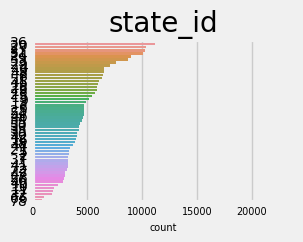

*** sex *** :


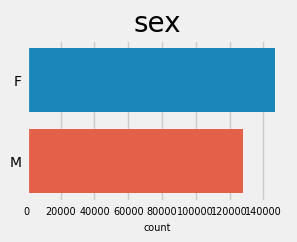

*** general_health *** :


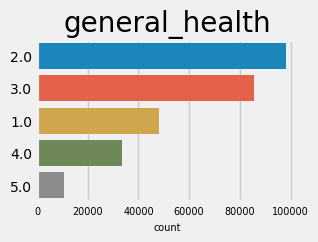

*** med_cost_issue *** :


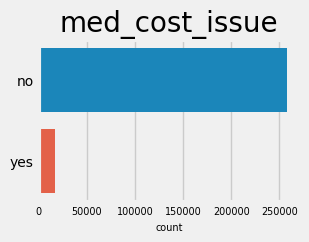

*** physical_activity *** :


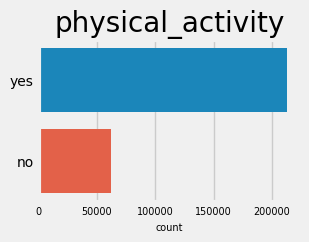

*** blood_pressure *** :


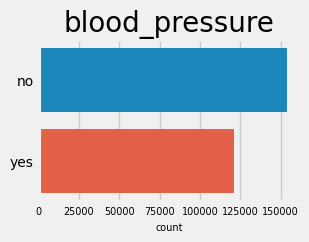

*** cholesterol *** :


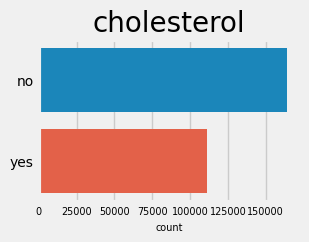

*** stroke *** :


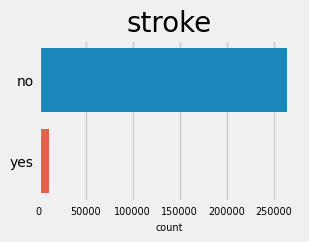

*** asthma *** :


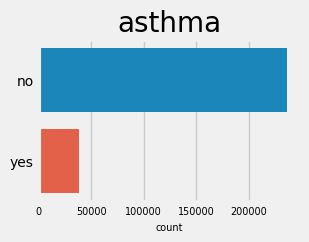

*** depression *** :


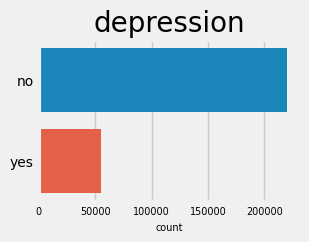

*** diabete *** :


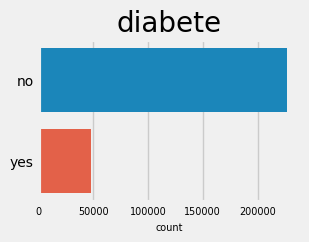

*** arthritis *** :


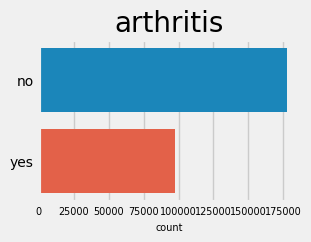

*** education *** :


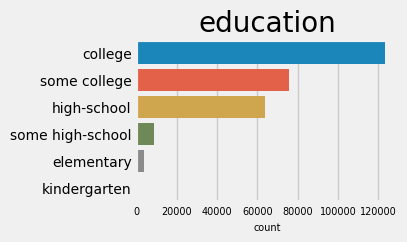

*** veteran *** :


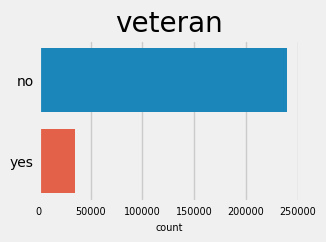

*** income *** :


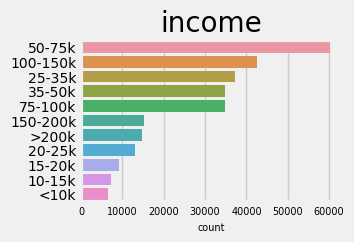

*** smoked_100_cig *** :


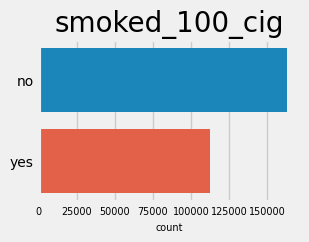

*** is_urban *** :


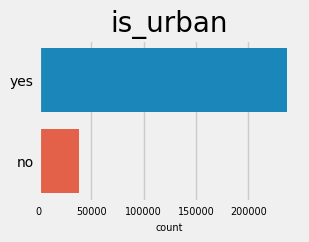

*** race *** :


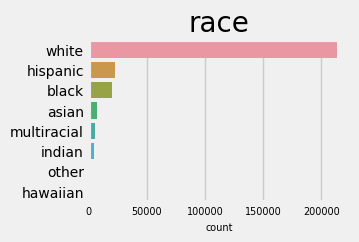

*** age *** :


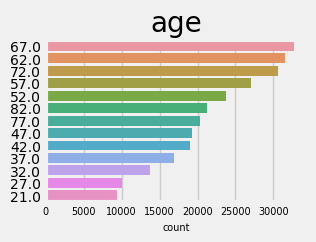

*** bmi *** :


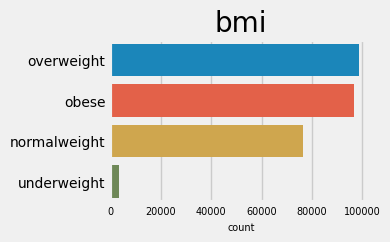

*** cvd *** :


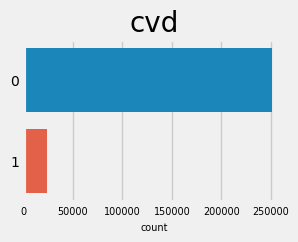

*** cancer *** :


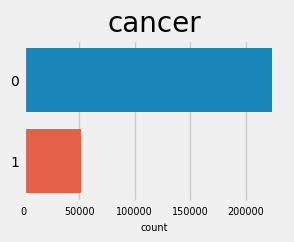

In [65]:
# importlib.reload(ef)
ef.draw_countplot(data1[categorical_columns])



*** weight *** :
50 lower and 50 higher values with the associated count:


,26.3088,26.7624,27.2160,30.0000,30.8448,31.7520,32.6592,33.1128,33.5664,34.0200,34.4736,34.9272,35.3808,35.8344,36.2880,36.7416,37.1952,37.6488,38.1024,38.5560,39.0096,39.4632,39.9168,40.0000,40.3704,40.8240,41.2776,41.7312,42.0000,42.1848,42.6384,43.0000,43.0920,43.5456,43.9992,44.4528,44.9064,45.0000,45.3600,45.8136,46.0000,46.2672,46.7208,47.0000,47.1744,47.6280,48.0000,48.0816,48.5352,48.9888,49.0000,49.4424,49.8960,50.0000
count,1,1,1,2,1,11,3,1,4,13,4,2,3,2,45,5,16,2,9,55,12,20,26,1,16,125,19,58,1,41,48,1,205,70,84,137,70,5,744,70,1,175,180,2,165,763,3,208,240,312,2,162,1755,13


,26.3088,26.7624,27.2160,30.0000,30.8448,31.7520,32.6592,33.1128,33.5664,34.0200,34.4736,34.9272,35.3808,35.8344,36.2880,36.7416,37.1952,37.6488,38.1024,38.5560,39.0096,39.4632,39.9168,40.0000,40.3704,40.8240,41.2776,41.7312,42.0000,42.1848,42.6384,43.0000,43.0920,43.5456,43.9992,44.4528,44.9064,45.0000,45.3600,45.8136,46.0000,46.2672,46.7208,47.0000,47.1744,47.6280,48.0000,48.0816,48.5352,48.9888,49.0000,49.4424,49.8960,50.0000,50.3496,50.8032,51.0000,51.2568,51.7104,52.0000,52.1640,52.6176,53.0000,53.0712,53.5248,53.9784,54.0000,54.4320,54.8856,55.0000,55.3392,55.7928,56.0000,56.2464,56.7000,57.0000,57.1536,57.6072,58.0000,58.0608,58.5144,58.9680,59.0000,59.4216,59.8752,60.0000,60.3288,60.7824,61.0000,61.2360,61.6896,62.0000,62.1432,62.5968,63.0000,63.0504,63.5040,63.9576,64.0000,64.4112,64.8648,65.0000,65.3184,65.7720,66.0000,66.2256,66.6792,67.0000,67.1328,67.5864,68.0000,68.0400,68.4936,68.9472,69.0000,69.4008,69.8544,70.0000,70.3080,70.7616,71.0000,71.2152,71.6688,72.0000,72.1224,72.5760,73.0000,73.0296,73.4832,73.9368,74.0000,74.3904,74.8440,75.0000,75.2976,75.7512,76.0000,76.2048,76.6584,77.0000,77.1120,77.5656,78.0000,78.0192,78.4728,78.9264,79.0000,79.3800,79.8336,80.0000,80.2872,80.7408,81.0000,81.1944,81.6480,82.0000,82.1016,82.5552,83.0000,83.0088,83.4624,83.9160,84.0000,84.3696,84.8232,85.0000,85.2768,85.7304,86.0000,86.1840,86.6376,87.0000,87.0912,87.5448,87.9984,88.0000,88.4520,88.9056,89.0000,89.3592,89.8128,90.0000,90.2664,90.7200,91.0000,91.1736,91.6272,92.0000,92.0808,92.5344,92.9880,93.4416,93.8952,94.0000,94.3488,94.8024,95.0000,95.2560,95.7096,96.0000,96.1632,96.6168,97.0000,97.0704,97.5240,97.9776,98.0000,98.4312,98.8848,99.0000,99.3384,99.7920,100.0000,100.2456,100.6992,101.0000,101.1528,101.6064,102.0000,102.0600,102.5136,102.9672,103.0000,103.4208,103.8744,104.0000,104.3280,104.7816,105.0000,105.2352,105.6888,106.0000,106.1424,106.5960,107.0496,107.5032,107.9568,108.4104,108.8640,109.0000,109.3176,109.7712,110.0000,110.2248,110.6784,111.1320,111.5856,112.0000,112.0392,112.4928,112.9464,113.0000,113.4000,113.8536,114.3072,114.7608,115.0000,115.2144,115.6680,116.0000,116.1216,116.5752,117.0000,117.0288,117.4824,117.9360,118.0000,118.3896,118.8432,119.0000,119.2968,119.7504,120.0000,120.2040,120.6576,121.1112,121.5648,122.0184,122.4720,122.9256,123.3792,123.8328,124.2864,124.7400,125.1936,125.6472,126.0000,126.1008,126.5544,127.0000,127.0080,127.4616,127.9152,128.3688,128.8224,129.2760,129.7296,130.0000,130.1832,130.6368,131.0904,131.5440,131.9976,132.4512,132.9048,133.3584,133.8120,134.0000,134.2656,134.7192,135.0000,135.1728,135.6264,136.0800,136.5336,136.9872,137.4408,137.8944,138.0000,138.3480,138.8016,139.2552,139.7088,140.0000,140.1624,140.6160,141.0000,141.0696,141.5232,141.9768,142.4304,142.8840,143.3376,143.7912,144.2448,144.6984,145.1520,145.6056,146.0592,146.5128,146.9664,147.4200,147.8736,148.3272,148.7808,149.2344,149.6880,150.0000,150.1416,150.5952,151.0488,151.5024,151.9560,152.4096,152.8632,153.3168,153.7704,154.0000,154.2240,154.6776,155.1312,155.5848,156.0384,156.4920,156.9456,157.3992,157.8528,158.3064,158.7600,159.0000,159.2136,159.6672,160.0000,160.1208,160.5744,161.0280,161.4816,161.9352,162.3888,162.8424,163.2960,163.7496,164.2032,164.6568,165.0000,165.1104,165.5640,166.0176,166.4712,166.9248,167.3784,167.8320,168.2856,168.7392,169.1928,169.6464,170.1000,170.5536,171.0072,171.4608,171.9144,172.3680,172.8216,173.2752,173.7288,174.1824,174.6360,175.0896,175.5432,175.9968,176.0000,176.4504,176.9040,177.3576,177.8112,178.2648,178.7184,179.1720,179.6256,180.0000,180.0792,180.5328,180.9864,181.4400,181.8936,182.0000,182.3472,183.2544,183.7080,184.1616,184.6152,185.0000,185.0688,185.5224,185.9760,186.4296,186.8832,187.3368,187.7904,188.2440,188.6976,189.1512,189.6048,190.0584,190.5120,191.4192,191.8728,192.7800,193.6872,194.5944,195.0000,195.0480,195.5016,195.9552,197.3160,198.2232,199.1304,199.5840,200.0000,200.4912,200.9448,201.8520,202.7592,203.2128,203.6664,204.1200,205.0272,205.9344

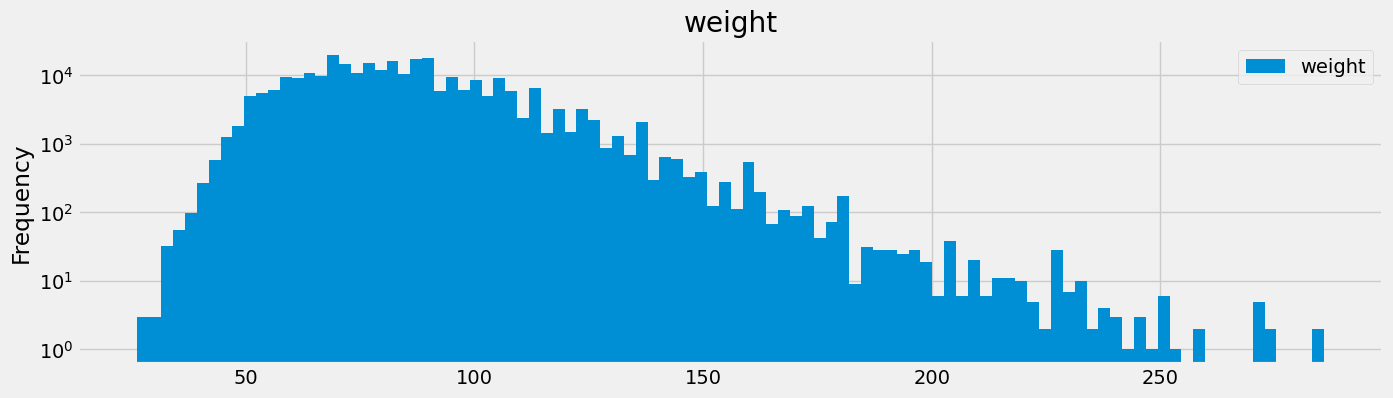


*** height *** :
50 lower and 50 higher values with the associated count:


,0.9150,0.9404,0.9600,0.9658,0.9912,1.0000,1.0166,1.0200,1.0300,1.0400,1.0420,1.0500,1.0600,1.0674,1.0700,1.0800,1.1000,1.1500,1.2000,1.2200,1.2454,1.2500,1.2708,1.2962,1.3000,1.3216,1.3400,1.3470,1.3500,1.3724,1.3978,1.4000,1.4232,1.4300,1.4400,1.4486,1.4500,1.4600,1.4700,1.4740,1.4800,1.4900,1.4994,1.5000,1.5100,1.5200,1.5250,1.5300,1.5400,1.5500,1.5504,1.5600,1.5700,1.5758,1.5800,1.5900,1.6000,1.6012,1.6100,1.6200,1.6266,1.6300,1.6400,1.6500,1.6520,1.6600,1.6700,1.6774,1.6800,1.6900,1.7000,1.7028,1.7100,1.7200,1.7282,1.7300,1.7400,1.7500,1.7536,1.7600,1.7700,1.7790,1.7800,1.7900,1.8000,1.8044,1.8100,1.8200,1.8300,1.8400,1.8500,1.8554,1.8600,1.8700,1.8800,1.8808,1.9000,1.9062,1.9316,1.9500,1.9570,1.9700,1.9800,1.9824,2.0000,2.0078,2.0332,2.0500,2.0586,2.0600,2.0840,2.1094,2.1350,2.1604,2.1858,2.2112,2.2366,2.2620,2.2874,2.3382,2.4144
count,9,4,1,4,2,3,1,3,1,1,6,18,3,3,1,1,1,1,3,48,11,2,16,17,6,18,1,68,4,51,98,11,248,3,3,495,9,1,3,929,3,11,2635,59,17,38,8648,24,14,56,9163,29,25,17789,22,15,108,19002,16,29,23712,37,31,90,21394,20,32,24490,39,21,98,21981,12,33,20816,23,18,67,19301,20,13,21552,30,6,44,16482,5,8,18899,2,13,9461,4,8,3,7680,6,4321,2639,3,1138,1,1,570,2,217,157,2,45,1,19,25,12,5,4,1,3,5,3,1,2


,0.9150,0.9404,0.9600,0.9658,0.9912,1.0000,1.0166,1.0200,1.0300,1.0400,1.0420,1.0500,1.0600,1.0674,1.0700,1.0800,1.1000,1.1500,1.2000,1.2200,1.2454,1.2500,1.2708,1.2962,1.3000,1.3216,1.3400,1.3470,1.3500,1.3724,1.3978,1.4000,1.4232,1.4300,1.4400,1.4486,1.4500,1.4600,1.4700,1.4740,1.4800,1.4900,1.4994,1.5000,1.5100,1.5200,1.5250,1.5300,1.5400,1.5500,1.5504,1.5600,1.5700,1.5758,1.5800,1.5900,1.6000,1.6012,1.6100,1.6200,1.6266,1.6300,1.6400,1.6500,1.6520,1.6600,1.6700,1.6774,1.6800,1.6900,1.7000,1.7028,1.7100,1.7200,1.7282,1.7300,1.7400,1.7500,1.7536,1.7600,1.7700,1.7790,1.7800,1.7900,1.8000,1.8044,1.8100,1.8200,1.8300,1.8400,1.8500,1.8554,1.8600,1.8700,1.8800,1.8808,1.9000,1.9062,1.9316,1.9500,1.9570,1.9700,1.9800,1.9824,2.0000,2.0078,2.0332,2.0500,2.0586,2.0600,2.0840,2.1094,2.1350,2.1604,2.1858,2.2112,2.2366,2.2620,2.2874,2.3382,2.4144
count,9,4,1,4,2,3,1,3,1,1,6,18,3,3,1,1,1,1,3,48,11,2,16,17,6,18,1,68,4,51,98,11,248,3,3,495,9,1,3,929,3,11,2635,59,17,38,8648,24,14,56,9163,29,25,17789,22,15,108,19002,16,29,23712,37,31,90,21394,20,32,24490,39,21,98,21981,12,33,20816,23,18,67,19301,20,13,21552,30,6,44,16482,5,8,18899,2,13,9461,4,8,3,7680,6,4321,2639,3,1138,1,1,570,2,217,157,2,45,1,19,25,12,5,4,1,3,5,3,1,2


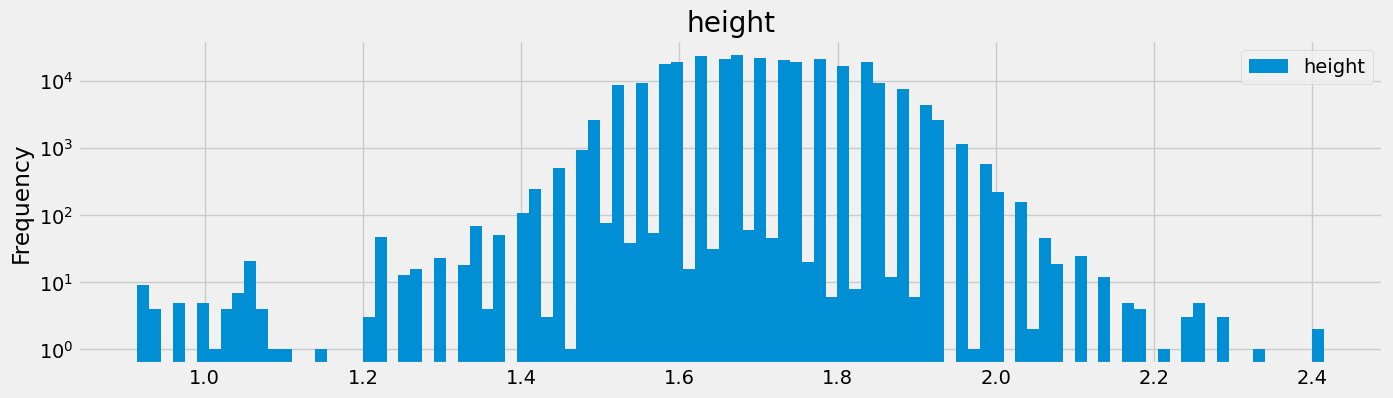


*** alcohol *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.967143,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,2.000000,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000,8.167143,8.332857,8.400000,8.571429,8.667143,9.000000,9.142857,9.200000,9.285714,9.332857,9.428571,9.600000,9.667143,9.800000,10.000000,10.285714,10.667143,10.714286,10.767143,10.800000,11.000000,11.200000,11.428571,11.600000,11.667143,12.000000,12.500000,12.800000,12.857143,13.000000,13.067143,13.332857,13.532857,13.714286,14.000000,14.285714,15.000000,15.332857,16.000000,16.667143,16.800000,17.000000,17.142857,17.400000,17.857143,18.000000,18.285714,18.400000,19.000000,20.000000,20.832857,21.428571,21.714286,22.200000,22.500000,22.667143,24.000000,25.000000,25.332857,26.132857,26.667143,28.000000,29.000000,29.400000,30.000000,32.571429,34.285714,35.000000,35.714286,36.000000,37.500000,41.067143,43.428571,50.000000
count,128853,15602,12491,6009,9574,6397,3653,5398,779,3853,6352,1496,5459,14,3101,3404,20,881,3316,1798,18,5355,747,3,5125,422,1530,47,9,1390,1252,3830,55,115,531,67,8626,342,4,25,1624,111,440,5,1130,11,2516,188,1303,66,712,22,2,323,25,1160,11,1313,30,83,2,349,2,113,6142,27,73,542,2,20,6,328,7,57,98,474,2,2,276,24,315,39,138,2,262,47,14,2325,1,2,2,1,50,6,367,3,198,8,28,113,33,7,2,47,1,6,17,1064,63,7,5,137,8,3,19,1,24,2,36,1,24,10,591,1,1,71,6,38,3,4,2,29,38,11,6,587,1,4,14,5,50,3,18,2,111,15,4,1,1,8,31,3,1,1,143,1,9,2,18,4,27,5,2,1,3,1,3,1,1,149,8,2,8,1,2,3,2,3,2,1,115,2,1,10,7,1,13,1,1,6,8,45,2,7,4,1,1,3,1,4,10,1,1,1,24,2,2,1,1,1,1,13,7,1,1,2,2,1,1,41,1,1,1,1,2,1,1,1,2


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.967143,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,2.000000,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000,8.167143,8.332857,8.400000,8.571429,8.667143,9.000000,9.142857,9.200000,9.285714,9.332857,9.428571,9.600000,9.667143,9.800000,10.000000,10.285714,10.667143,10.714286,10.767143,10.800000,11.000000,11.200000,11.428571,11.600000,11.667143,12.000000,12.500000,12.800000,12.857143,13.000000,13.067143,13.332857,13.532857,13.714286,14.000000,14.285714,15.000000,15.332857,16.000000,16.667143,16.800000,17.000000,17.142857,17.400000,17.857143,18.000000,18.285714,18.400000,19.000000,20.000000,20.832857,21.428571,21.714286,22.200000,22.500000,22.667143,24.000000,25.000000,25.332857,26.132857,26.667143,28.000000,29.000000,29.400000,30.000000,32.571429,34.285714,35.000000,35.714286,36.000000,37.500000,41.067143,43.428571,50.000000,50.667143,52.267143,53.667143,56.000000,58.000000,60.000000,62.000000,63.332857,65.142857,70.932857,75.000000,76.000000
count,128853,15602,12491,6009,9574,6397,3653,5398,779,3853,6352,1496,5459,14,3101,3404,20,881,3316,1798,18,5355,747,3,5125,422,1530,47,9,1390,1252,3830,55,115,531,67,8626,342,4,25,1624,111,440,5,1130,11,2516,188,1303,66,712,22,2,323,25,1160,11,1313,30,83,2,349,2,113,6142,27,73,542,2,20,6,328,7,57,98,474,2,2,276,24,315,39,138,2,262,47,14,2325,1,2,2,1,50,6,367,3,198,8,28,113,33,7,2,47,1,6,17,1064,63,7,5,137,8,3,19,1,24,2,36,1,24,10,591,1,1,71,6,38,3,4,2,29,38,11,6,587,1,4,14,5,50,3,18,2,111,15,4,1,1,8,31,3,1,1,143,1,9,2,18,4,27,5,2,1,3,1,3,1,1,149,8,2,8,1,2,3,2,3,2,1,115,2,1,10,7,1,13,1,1,6,8,45,2,7,4,1,1,3,1,4,10,1,1,1,24,2,2,1,1,1,1,13,7,1,1,2,2,1,1,41,1,1,1,1,2,1,1,1,2,1,1,1,1,1,4,1,1,1,1,1,2


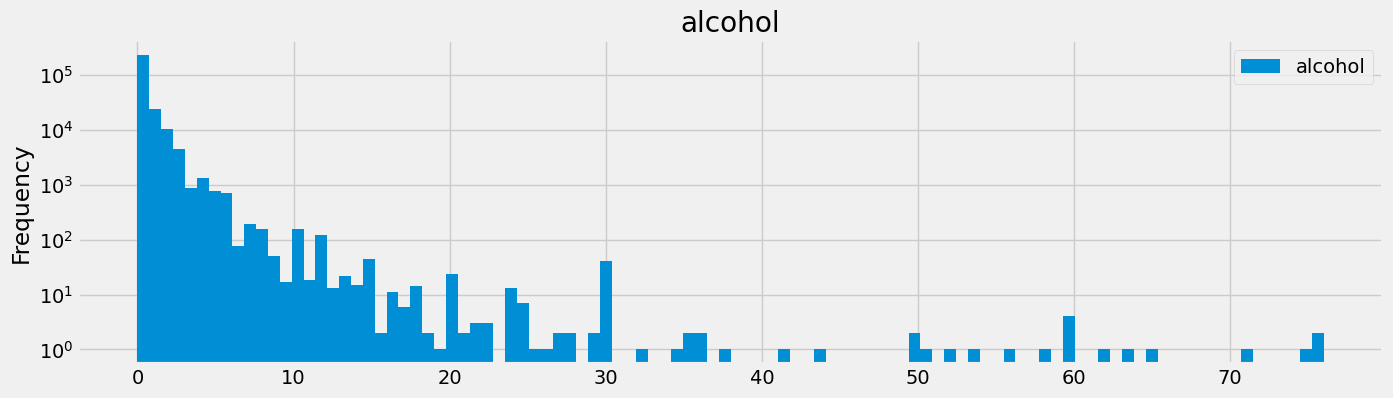


*** fruits *** :
50 lower and 50 higher values with the associated count:


,0.00,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.10,0.12,0.13,0.14,0.15,0.16,0.17,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.66,0.67,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,1.00,1.01,1.02,1.03,1.04,1.06,1.07,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.50,1.52,1.53,1.54,1.56,1.57,1.58,1.60,1.61,1.62,1.63,1.64,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.83,1.84,1.85,1.86,1.87,1.88,1.90,1.91,1.93,1.94,1.96,1.97,2.00,2.02,2.03,2.04,2.06,2.07,2.09,2.10,2.11,2.12,2.13,2.14,2.16,2.17,2.19,2.20,2.21,2.23,2.24,2.26,2.27,2.28,2.29,2.30,2.31,2.33,2.34,2.35,2.37,2.40,2.41,2.42,2.43,2.47,2.50,2.52,2.53,2.57,2.59,2.60,2.61,2.64,2.66,2.67,2.69,2.70,2.71,2.73,2.76,2.77,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.93,2.96,2.99,3.00,3.02,3.03,3.04,3.07,3.10,3.13,3.14,3.15,3.16,3.17,3.19,3.20,3.21,3.23,3.27,3.28,3.29,3.30,3.32,3.33,3.34,3.36,3.37,3.40,3.42,3.43,3.44,3.45,3.47,3.50,3.53,3.57,3.59,3.60,3.63,3.64,3.67,3.70,3.71,3.73,3.74,3.80,3.83,3.86,3.87,3.97,4.00,4.01,4.02,4.03,4.07,4.10,4.13,4.14,4.17,4.20,4.23,4.27,4.28,4.29,4.30,4.31,4.32,4.33,4.34,4.36,4.39,4.40,4.43,4.46,4.47,4.50,4.57,4.58,4.67,4.71,4.72,4.80,4.83,4.86,4.87,4.93,5.00,5.01,5.02,5.03,5.07,5.10,5.13,5.14,5.17,5.20,5.23,5.27,5.29,5.30,5.33,5.40,5.43,5.44,5.50,5.57,5.67,5.71,5.72,5.83,5.86,5.93,6.00,6.02,6.03,6.07,6.10,6.13,6.14,6.17,6.20,6.23,6.27,6.29,6.30,6.31,6.43,6.50,6.53,6.57,6.60,6.67,6.71,7.00,7.02,7.03,7.07,7.10,7.13,7.14,7.15,7.16,7.17,7.20,7.23,7.28,7.29,7.30,7.33,7.40,7.43,7.50,7.53,7.57,7.67,7.71,7.83,7.86,7.89,7.93,8.00,8.02,8.03,8.07,8.10,8.14,8.20,8.30,8.43,8.57,8.58,8.66,8.71,8.81,9.00,9.02,9.14,9.17,9.23,9.86,10.00,10.02,10.03,10.10,10.13,10.14,10.17,10.23,10.29,10.33,10.40,10.50,10.67,10.71,10.78,11.00,11.02,11.07,11.14,11.29,11.33,11.42,12.00,12.02,12.03,12.10,12.17,12.23,12.29,12.67,12.86,13.00,13.14,13.28,13.29,13.30,13.56,13.58,14.00,14.02,14.03,14.07,14.10,14.13,14.14,14.16,14.17,14.21,14.28,14.29,14.31,14.47,14.57,14.83,15.00,15.02,15.03,15.13,15.14,15.17,15.27,15.29,15.33,15.43,15.57,15.71,15.83,16.00,16.14,17.00,18.00,18.17,18.23,18.29,18.30,18.71,18.86,19.00,20.00,20.02,20.03,20.07,20.10,20.13,20.14,20.17,20.29,20.43,21.00,21.10,21.14,21.43,22.00,22.02,22.14,23.00,23.10,23.14,24.00,24.20,24.67,25.00,25.03,25.17,25.43,25.67,25.83,26.00,27.00,28.00,28.14,28.71,30.00,30.02,30.03,30.07,30.10,30.13,30.14,30.17,30.20,30.23,30.27,30.29,30.33,30.40,30.43,30.50,30.57,30.67,30.71,30.80,30.86,31.00,31.14,31.43,32.00,33.00,34.00,34.29,35.00,35.50,36.00,37.00,40.00,41.00,44.14,45.00,45.02,46.00,50.00
count,4588,830,1684,494,230,347,2653,282,2502,179,1852,4400,144,686,3274,176,1465,503,47,605,639,28,200,874,1018,7810,452,889,1261,1701,412,136,1356,146,370,810,12,277,12619,59,982,1807,253,75,3372,1,158,908,47,3,436,8820,1583,592,1425,9,107,258,938,309,1769,117,522,6312,2949,626,1052,1,174,266,710,109,194,362,2,749,491,1006,4268,90,340,114,275,54,1,327,94,3,150,62,25,38871,5,3584,3967,140,42,4056,11,1868,15,19,1156,8709,185,101,1911,7,16,413,56,3,300,76,36,193,642,6627,38,7,3,1290,145,9,27,8,38,2,183,2,488,6158,1,29,39,72,1403,2,72,12,17,2558,3,53,1,1,12,7,39,623,2,10,26,1577,106,17,7,1,19,5,6,5,16,5,156,7,26,313,8,4,10,1,25,1,3,5,32625,1637,1952,6,5,1951,1,793,1,1,519,2853,6,624,1,145,1,99,3,2,64,11,2536,5,6,335,1,1,1,50,1,5,1817,25,342,1,9,647,1,3,1,3,1,162,1,4,348,1,2,2,3,3,1,46,1,8,88,2,3,4,1,13,1,2,14946,621,616,1,576,237,173,883,6,2,177,2,47,1,28,20,3,742,72,24,117,1,1,7,16,1,563,26,1,10,103,3,211,10,1,3,1,37,6,124,13,1,4,15,23,3,3,5125,4,108,106,121,55,30,132,30,9,10,3,1,130,20,7,2,18,

,0.00,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.10,0.12,0.13,0.14,0.15,0.16,0.17,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.66,0.67,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,1.00,1.01,1.02,1.03,1.04,1.06,1.07,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.50,1.52,1.53,1.54,1.56,1.57,1.58,1.60,1.61,1.62,1.63,1.64,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.83,1.84,1.85,1.86,1.87,1.88,1.90,1.91,1.93,1.94,1.96,1.97,2.00,2.02,2.03,2.04,2.06,2.07,2.09,2.10,2.11,2.12,2.13,2.14,2.16,2.17,2.19,2.20,2.21,2.23,2.24,2.26,2.27,2.28,2.29,2.30,2.31,2.33,2.34,2.35,2.37,2.40,2.41,2.42,2.43,2.47,2.50,2.52,2.53,2.57,2.59,2.60,2.61,2.64,2.66,2.67,2.69,2.70,2.71,2.73,2.76,2.77,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.93,2.96,2.99,3.00,3.02,3.03,3.04,3.07,3.10,3.13,3.14,3.15,3.16,3.17,3.19,3.20,3.21,3.23,3.27,3.28,3.29,3.30,3.32,3.33,3.34,3.36,3.37,3.40,3.42,3.43,3.44,3.45,3.47,3.50,3.53,3.57,3.59,3.60,3.63,3.64,3.67,3.70,3.71,3.73,3.74,3.80,3.83,3.86,3.87,3.97,4.00,4.01,4.02,4.03,4.07,4.10,4.13,4.14,4.17,4.20,4.23,4.27,4.28,4.29,4.30,4.31,4.32,4.33,4.34,4.36,4.39,4.40,4.43,4.46,4.47,4.50,4.57,4.58,4.67,4.71,4.72,4.80,4.83,4.86,4.87,4.93,5.00,5.01,5.02,5.03,5.07,5.10,5.13,5.14,5.17,5.20,5.23,5.27,5.29,5.30,5.33,5.40,5.43,5.44,5.50,5.57,5.67,5.71,5.72,5.83,5.86,5.93,6.00,6.02,6.03,6.07,6.10,6.13,6.14,6.17,6.20,6.23,6.27,6.29,6.30,6.31,6.43,6.50,6.53,6.57,6.60,6.67,6.71,7.00,7.02,7.03,7.07,7.10,7.13,7.14,7.15,7.16,7.17,7.20,7.23,7.28,7.29,7.30,7.33,7.40,7.43,7.50,7.53,7.57,7.67,7.71,7.83,7.86,7.89,7.93,8.00,8.02,8.03,8.07,8.10,8.14,8.20,8.30,8.43,8.57,8.58,8.66,8.71,8.81,9.00,9.02,9.14,9.17,9.23,9.86,10.00,10.02,10.03,10.10,10.13,10.14,10.17,10.23,10.29,10.33,10.40,10.50,10.67,10.71,10.78,11.00,11.02,11.07,11.14,11.29,11.33,11.42,12.00,12.02,12.03,12.10,12.17,12.23,12.29,12.67,12.86,13.00,13.14,13.28,13.29,13.30,13.56,13.58,14.00,14.02,14.03,14.07,14.10,14.13,14.14,14.16,14.17,14.21,14.28,14.29,14.31,14.47,14.57,14.83,15.00,15.02,15.03,15.13,15.14,15.17,15.27,15.29,15.33,15.43,15.57,15.71,15.83,16.00,16.14,17.00,18.00,18.17,18.23,18.29,18.30,18.71,18.86,19.00,20.00,20.02,20.03,20.07,20.10,20.13,20.14,20.17,20.29,20.43,21.00,21.10,21.14,21.43,22.00,22.02,22.14,23.00,23.10,23.14,24.00,24.20,24.67,25.00,25.03,25.17,25.43,25.67,25.83,26.00,27.00,28.00,28.14,28.71,30.00,30.02,30.03,30.07,30.10,30.13,30.14,30.17,30.20,30.23,30.27,30.29,30.33,30.40,30.43,30.50,30.57,30.67,30.71,30.80,30.86,31.00,31.14,31.43,32.00,33.00,34.00,34.29,35.00,35.50,36.00,37.00,40.00,41.00,44.14,45.00,45.02,46.00,50.00,50.14,50.50,50.71,52.00,53.00,54.00,57.00,60.00,60.07,60.14,60.17,61.00,65.29,67.00,80.02,82.00,83.30,88.29,89.00,90.00,91.00,91.14,91.43,92.00,92.29,93.00,93.14,98.00,98.02,98.03,99.00,99.02,99.03,99.07,99.10,99.13,99.14,99.17,99.20,99.23,99.27,99.29,99.33,99.40,99.43,99.47,99.50,99.53,99.57,99.67,99.71,99.83,99.86,100.00,100.43,100.71,101.00,101.14,101.86,102.00,102.30,103.00,104.00,105.00,106.00,106.14,108.00,109.00,111.00,113.14,114.00,119.00,120.00,129.00,149.00,159.00,197.00,198.00
count,4588,830,1684,494,230,347,2653,282,2502,179,1852,4400,144,686,3274,176,1465,503,47,605,639,28,200,874,1018,7810,452,889,1261,1701,412,136,1356,146,370,810,12,277,12619,59,982,1807,253,75,3372,1,158,908,47,3,436,8820,1583,592,1425,9,107,258,938,309,1769,117,522,6312,2949,626,1052,1,174,266,710,109,194,362,2,749,491,1006,4268,90,340,114,275,54,1,327,94,3,150,62,25,38871,5,3584,3967,140,42,4056,11,1868,15,19,1156,8709,185,101,1911,7,16,413,56,3,300,76,36,193,642,6627,38,7,3,1290,145,9,27,8,38,2,183,2,488,61

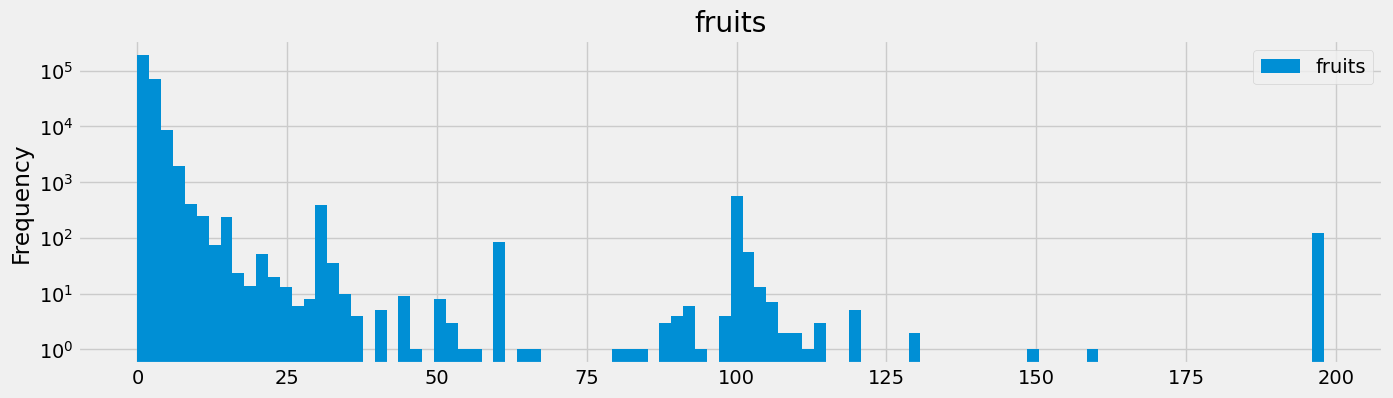


*** vegetables *** :
50 lower and 50 higher values with the associated count:


,0.00,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.60,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.70,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.98,2.99,3.00,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.40,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49,3.50,3.51,3.52,3.53,3.54,3.55,3.56,3.57,3.58,3.59,3.60,3.61,3.62,3.63,3.64,3.65,3.66,3.67,3.68,3.69,3.70,3.71,3.72,3.73,3.74,3.75,3.76,3.77,3.78,3.79,3.80,3.81,3.82,3.83,3.84,3.85,3.86,3.87,3.88,3.89,3.90,3.91,3.92,3.93,3.94,3.95,3.97,3.98,3.99,4.00,4.01,4.02,4.03,4.04,4.05,4.06,4.07,4.08,4.09,4.10,4.11,4.12,4.13,4.14,4.15,4.16,4.17,4.18,4.19,4.20,4.21,4.22,4.23,4.24,4.25,4.26,4.27,4.28,4.29,4.30,4.31,4.32,4.33,4.34,4.35,4.36,4.37,4.38,4.39,4.40,4.41,4.42,4.43,4.44,4.45,4.46,4.47,4.48,4.49,4.50,4.51,4.52,4.53,4.54,4.55,4.56,4.57,4.58,4.59,4.60,4.61,4.62,4.63,4.64,4.65,4.66,4.67,4.68,4.69,4.70,4.71,4.72,4.73,4.74,4.75,4.76,4.77,4.78,4.79,4.80,4.81,4.82,4.83,4.84,4.85,4.86,4.87,4.88,4.89,4.90,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.99,5.00,5.01,5.02,5.03,5.04,5.05,5.06,5.07,5.08,5.09,5.10,5.11,5.12,5.13,5.14,5.15,5.16,5.17,5.18,5.19,5.20,5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.30,5.31,5.32,5.33,5.34,5.35,5.36,5.37,5.38,5.39,5.40,5.41,5.42,5.43,5.44,5.45,5.46,5.47,5.48,5.49,5.50,5.51,5.52,5.53,5.54,5.56,5.57,5.58,5.59,5.60,5.61,5.62,5.63,5.64,5.65,5.66,5.67,5.68,5.69,5.70,5.71,5.72,5.73,5.74,5.75,5.76,5.77,5.78,5.79,5.80,5.81,5.82,5.83,5.84,5.85,5.86,5.87,5.88,5.89,5.90,5.91,5.92,5.93,5.94,5.95,5.96,5.97,5.98,5.99,6.00,6.01,6.02,6.03,6.04,6.05,6.06,6.07,6.08,6.09,6.10,6.11,6.12,6.13,6.14,6.15,6.16,6.17,6.18,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,6.28,6.29,6.30,6.31,6.32,6.33,6.34,6.35,6.36,6.37,6.38,6.39,6.40,6.42,6.43,6.44,6.45,6.46,6.47,6.49,6.50,6.51,6.52,6.53,6.54,6.56,6.57,6.58,6.59,6.60,6.61,6.62,6.63,6.64,6.65,6.66,6.67,6.70,6.71,6.72,6.73,6.74,6.75,6.76,6.77,6.78,6.79,6.80,6.81,6.83,6.84,6.85,6.86,6.87,6.88,6.89,6.90,6.91,6.92,6.93,6.94,6.96,6.97,6.99,7.00,7.01,7.02,7.03,7.04,7.05,7.06,7.07,7.09,7.10,7.12,7.13,7.14,7.15,7.16,7.17,7.18,7.19,7.20,7.21,7.22,7.23,7.24,7.25,7.26,7.27,7.28,7.29,7.30,7.31,7.32,7.33,7.34,7.35,7.36,7.37,7.38,7.39,7.40,7.41,7.42,7.43,7.44,7.45,7.46,7.47,7.48,7.49,7.50,7.51,7.52,7.53,7.54,7.55,7.56,7.57,7.58,7.59,7.60,7.61,7.62,7.63,7.64,7.65,7.66,7.67,7.69,7.70,7.71,7.72,7.73,7.74,7.75,7.76,7.77,7.78,7.79,7.80,7.81,7.82,7.83,7.84,7.85,7.86,7.87,7.88,7.89,7.90,7.91,7.92,7.93,7.94,7.95,7.96,7.97,7.99,8.00,8.01,8.02,8.03,8.04,8.05,8.06,8.07,8.09,8.10,8.11,8.13,8.14,8.15,8.16,8.17,8.20,8.21,8.22

,0.00,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.60,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.70,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.98,2.99,3.00,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.40,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49,3.50,3.51,3.52,3.53,3.54,3.55,3.56,3.57,3.58,3.59,3.60,3.61,3.62,3.63,3.64,3.65,3.66,3.67,3.68,3.69,3.70,3.71,3.72,3.73,3.74,3.75,3.76,3.77,3.78,3.79,3.80,3.81,3.82,3.83,3.84,3.85,3.86,3.87,3.88,3.89,3.90,3.91,3.92,3.93,3.94,3.95,3.97,3.98,3.99,4.00,4.01,4.02,4.03,4.04,4.05,4.06,4.07,4.08,4.09,4.10,4.11,4.12,4.13,4.14,4.15,4.16,4.17,4.18,4.19,4.20,4.21,4.22,4.23,4.24,4.25,4.26,4.27,4.28,4.29,4.30,4.31,4.32,4.33,4.34,4.35,4.36,4.37,4.38,4.39,4.40,4.41,4.42,4.43,4.44,4.45,4.46,4.47,4.48,4.49,4.50,4.51,4.52,4.53,4.54,4.55,4.56,4.57,4.58,4.59,4.60,4.61,4.62,4.63,4.64,4.65,4.66,4.67,4.68,4.69,4.70,4.71,4.72,4.73,4.74,4.75,4.76,4.77,4.78,4.79,4.80,4.81,4.82,4.83,4.84,4.85,4.86,4.87,4.88,4.89,4.90,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.99,5.00,5.01,5.02,5.03,5.04,5.05,5.06,5.07,5.08,5.09,5.10,5.11,5.12,5.13,5.14,5.15,5.16,5.17,5.18,5.19,5.20,5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.30,5.31,5.32,5.33,5.34,5.35,5.36,5.37,5.38,5.39,5.40,5.41,5.42,5.43,5.44,5.45,5.46,5.47,5.48,5.49,5.50,5.51,5.52,5.53,5.54,5.56,5.57,5.58,5.59,5.60,5.61,5.62,5.63,5.64,5.65,5.66,5.67,5.68,5.69,5.70,5.71,5.72,5.73,5.74,5.75,5.76,5.77,5.78,5.79,5.80,5.81,5.82,5.83,5.84,5.85,5.86,5.87,5.88,5.89,5.90,5.91,5.92,5.93,5.94,5.95,5.96,5.97,5.98,5.99,6.00,6.01,6.02,6.03,6.04,6.05,6.06,6.07,6.08,6.09,6.10,6.11,6.12,6.13,6.14,6.15,6.16,6.17,6.18,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,6.28,6.29,6.30,6.31,6.32,6.33,6.34,6.35,6.36,6.37,6.38,6.39,6.40,6.42,6.43,6.44,6.45,6.46,6.47,6.49,6.50,6.51,6.52,6.53,6.54,6.56,6.57,6.58,6.59,6.60,6.61,6.62,6.63,6.64,6.65,6.66,6.67,6.70,6.71,6.72,6.73,6.74,6.75,6.76,6.77,6.78,6.79,6.80,6.81,6.83,6.84,6.85,6.86,6.87,6.88,6.89,6.90,6.91,6.92,6.93,6.94,6.96,6.97,6.99,7.00,7.01,7.02,7.03,7.04,7.05,7.06,7.07,7.09,7.10,7.12,7.13,7.14,7.15,7.16,7.17,7.18,7.19,7.20,7.21,7.22,7.23,7.24,7.25,7.26,7.27,7.28,7.29,7.30,7.31,7.32,7.33,7.34,7.35,7.36,7.37,7.38,7.39,7.40,7.41,7.42,7.43,7.44,7.45,7.46,7.47,7.48,7.49,7.50,7.51,7.52,7.53,7.54,7.55,7.56,7.57,7.58,7.59,7.60,7.61,7.62,7.63,7.64,7.65,7.66,7.67,7.69,7.70,7.71,7.72,7.73,7.74,7.75,7.76,7.77,7.78,7.79,7.80,7.81,7.82,7.83,7.84,7.85,7.86,7.87,7.88,7.89,7.90,7.91,7.92,7.93,7.94,7.95,7.96,7.97,7.99,8.00,8.01,8.02,8.03,8.04,8.05,8.06,8.07,8.09,8.10,8.11,8.13,8.14,8.15,8.16,8.17,8.20,8.21,8.22

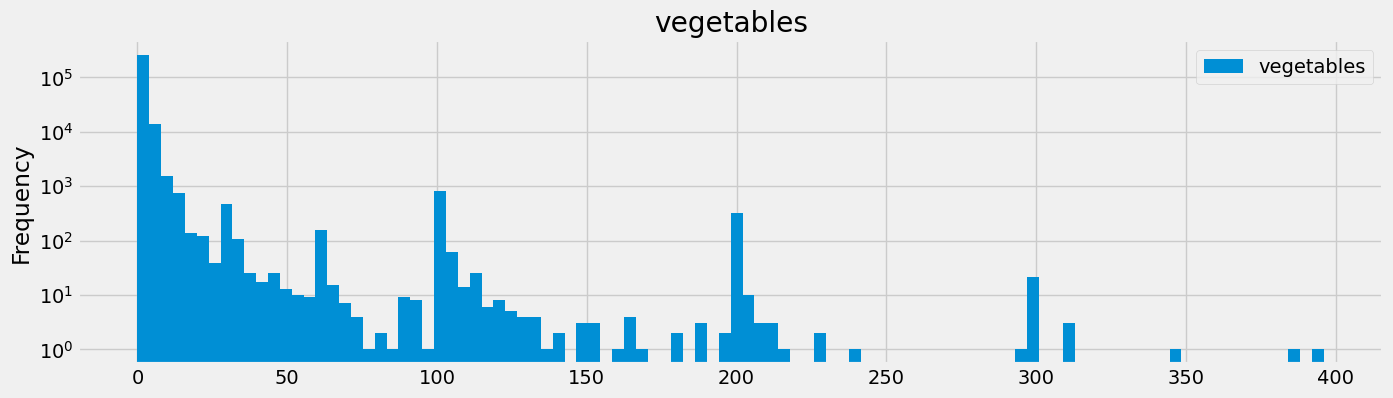

In [66]:
# importlib.reload(ef)
ef.draw_histogram(data1[numerical_columns], bins=100, logy=True)

"""
- height has a strange shape because there were a mix of heights in feet/inches (majority) and m/cm (minority)
and all values were transformed to m/cm so many multiples of 1 inch (0.025m)
- fruits and vegetables have peaks at multiple of 99 because they make the mistake to add 2 (fruits) and 4 (vegetables)
original variables together keeping the 99 values that means "doesn't know" for the quantity
""";


*** fruits *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.020000,0.020000,0.030000,0.030000,0.040000,0.050000,0.060000,0.070000,0.070000,0.090000,0.100000,0.100000,0.120000,0.130000,0.130000,0.140000,0.140000,0.150000,0.160000,0.170000,0.170000,0.190000,0.200000,0.200000,0.210000,0.220000,0.230000,0.230000,0.240000,0.250000,0.260000,0.270000,0.270000,0.280000,0.290000,0.290000,0.300000,0.310000,0.320000,0.330000,0.330000,0.340000,0.350000,0.360000,0.370000,0.390000,0.400000,0.400000,0.410000,0.420000,0.430000,0.430000,0.440000,0.450000,0.460000,0.470000,0.470000,0.490000,0.500000,0.510000,0.520000,0.530000,0.530000,0.540000,0.550000,0.560000,0.570000,0.570000,0.580000,0.590000,0.600000,0.610000,0.620000,0.630000,0.640000,0.660000,0.670000,0.670000,0.690000,0.700000,0.710000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000,0.830000,0.840000,0.850000,0.860000,0.860000,0.870000,0.880000,0.890000,0.900000,0.910000,0.920000,0.930000,0.933333,0.938000,0.940000,0.950000,0.957000,0.960000,0.970000,0.980000,1.000000,1.000667,1.001000,1.002333,1.003333,1.004333,1.004667,1.005667,1.006667,1.007667,1.009000,1.009667,1.010000,1.011000,1.013333,1.014333,1.016667,1.019000,1.020000,1.022333,1.023667,1.026667,1.028667,1.030000,1.033333,1.038000,1.040000,1.047667,1.060000,1.066667,1.070000,1.090000,1.100000,1.110000,1.120000,1.130000,1.140000,1.150000,1.160000,1.170000,1.180000,1.190000,1.200000,1.210000,1.220000,1.230000,1.240000,1.260000,1.270000,1.280000,1.290000,1.300000,1.310000,1.320000,1.330000,1.340000,1.350000,1.360000,1.370000,1.380000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.450000,1.460000,1.470000,1.500000,1.520000,1.530000,1.540000,1.560000,1.570000,1.580000,1.600000,1.610000,1.620000,1.630000,1.640000,1.660000,1.670000,1.680000,1.690000,1.700000,1.710000,1.710000,1.720000,1.730000,1.740000,1.750000,1.760000,1.770000,1.780000,1.790000,1.800000,1.810000,1.830000,1.840000,1.850000,1.860000,1.870000,1.880000,1.900000,1.910000,1.930000,1.940000,1.960000,1.970000,2.000000,2.004667,2.005667,2.020000,2.030000,2.033333,2.040000,2.060000,2.070000,2.090000,2.100000,2.110000,2.120000,2.130000,2.140000,2.140000,2.160000,2.170000,2.190000,2.200000,2.210000,2.230000,2.240000,2.260000,2.270000,2.280000,2.290000,2.300000,2.310000,2.330000,2.340000,2.350000,2.370000,2.400000,2.410000,2.420000,2.430000,2.470000,2.500000,2.520000,2.530000,2.570000,2.590000,2.600000,2.610000,2.640000,2.660000,2.670000,2.690000,2.700000,2.710000,2.730000,2.760000,2.770000,2.800000,2.810000,2.820000,2.830000,2.840000,2.850000,2.860000,2.860000,2.870000,2.880000,2.890000,2.900000,2.930000,2.943000,2.960000,2.966667,2.990000,3.000000,3.020000,3.030000,3.033333,3.038000,3.040000,3.047667,3.066667,3.070000,3.100000,3.130000,3.140000,3.150000,3.160000,3.170000,3.190000,3.200000,3.210000,3.230000,3.270000,3.280000,3.290000,3.300000,3.300000,3.320000,3.330000,3.340000,3.360000,3.370000,3.400000,3.420000,3.430000,3.440000,3.450000,3.470000,3.500000,3.530000,3.570000,3.590000,3.600000,3.630000,3.640000,3.670000,3.700000,3.710000,3.730000,3.740000,3.800000,3.830000,3.860000,3.870000,3.970000,4.000000,4.010000,4.020000,4.030000,4.070000,4.100000,4.130000,4.140000,4.170000,4.200000,4.230000,4.270000,4.280000,4.290000,4.300000,4.310000,4.320000,4.330000,4.340000,4.360000,4.390000,4.400000,4.430000,4.460000,4.470000,4.500000,4.570000,4.580000,4.670000,4.710000,4.720000,4.800000,4.830000,4.860000,4.870000,4.930000,5.000000,5.010000,5.020000,5.030000,5.070000,5.100000,5.130000,5.140000,5.170000,5.200000,5.230000,5.270000,5.290000,5.300000,5.330000,5.400000,5.430000,5.440000,5.500000,5.570000,5.670000,5.710000,5.720000,5.830000,5.860000,5.930000,6.000000,6.020000,6.030000,6.070000,6.100000,6.130000,6.140000,6.170000,6.200000,6.230000,6.270000,6.290000,6.300000,6.310000,6.430000,6.500000,6.530000,6.570000,6.600000,6.670000,6.710000,7.000000,7.020000,7.030000,7.070000,7.100000,7.130000,7.140000,7.140000,7.150000,7.170000,7.200000,7.230000,7.2

,0.000000,0.020000,0.020000,0.030000,0.030000,0.040000,0.050000,0.060000,0.070000,0.070000,0.090000,0.100000,0.100000,0.120000,0.130000,0.130000,0.140000,0.140000,0.150000,0.160000,0.170000,0.170000,0.190000,0.200000,0.200000,0.210000,0.220000,0.230000,0.230000,0.240000,0.250000,0.260000,0.270000,0.270000,0.280000,0.290000,0.290000,0.300000,0.310000,0.320000,0.330000,0.330000,0.340000,0.350000,0.360000,0.370000,0.390000,0.400000,0.400000,0.410000,0.420000,0.430000,0.430000,0.440000,0.450000,0.460000,0.470000,0.470000,0.490000,0.500000,0.510000,0.520000,0.530000,0.530000,0.540000,0.550000,0.560000,0.570000,0.570000,0.580000,0.590000,0.600000,0.610000,0.620000,0.630000,0.640000,0.660000,0.670000,0.670000,0.690000,0.700000,0.710000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000,0.830000,0.840000,0.850000,0.860000,0.860000,0.870000,0.880000,0.890000,0.900000,0.910000,0.920000,0.930000,0.933333,0.938000,0.940000,0.950000,0.957000,0.960000,0.970000,0.980000,1.000000,1.000667,1.001000,1.002333,1.003333,1.004333,1.004667,1.005667,1.006667,1.007667,1.009000,1.009667,1.010000,1.011000,1.013333,1.014333,1.016667,1.019000,1.020000,1.022333,1.023667,1.026667,1.028667,1.030000,1.033333,1.038000,1.040000,1.047667,1.060000,1.066667,1.070000,1.090000,1.100000,1.110000,1.120000,1.130000,1.140000,1.150000,1.160000,1.170000,1.180000,1.190000,1.200000,1.210000,1.220000,1.230000,1.240000,1.260000,1.270000,1.280000,1.290000,1.300000,1.310000,1.320000,1.330000,1.340000,1.350000,1.360000,1.370000,1.380000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.450000,1.460000,1.470000,1.500000,1.520000,1.530000,1.540000,1.560000,1.570000,1.580000,1.600000,1.610000,1.620000,1.630000,1.640000,1.660000,1.670000,1.680000,1.690000,1.700000,1.710000,1.710000,1.720000,1.730000,1.740000,1.750000,1.760000,1.770000,1.780000,1.790000,1.800000,1.810000,1.830000,1.840000,1.850000,1.860000,1.870000,1.880000,1.900000,1.910000,1.930000,1.940000,1.960000,1.970000,2.000000,2.004667,2.005667,2.020000,2.030000,2.033333,2.040000,2.060000,2.070000,2.090000,2.100000,2.110000,2.120000,2.130000,2.140000,2.140000,2.160000,2.170000,2.190000,2.200000,2.210000,2.230000,2.240000,2.260000,2.270000,2.280000,2.290000,2.300000,2.310000,2.330000,2.340000,2.350000,2.370000,2.400000,2.410000,2.420000,2.430000,2.470000,2.500000,2.520000,2.530000,2.570000,2.590000,2.600000,2.610000,2.640000,2.660000,2.670000,2.690000,2.700000,2.710000,2.730000,2.760000,2.770000,2.800000,2.810000,2.820000,2.830000,2.840000,2.850000,2.860000,2.860000,2.870000,2.880000,2.890000,2.900000,2.930000,2.943000,2.960000,2.966667,2.990000,3.000000,3.020000,3.030000,3.033333,3.038000,3.040000,3.047667,3.066667,3.070000,3.100000,3.130000,3.140000,3.150000,3.160000,3.170000,3.190000,3.200000,3.210000,3.230000,3.270000,3.280000,3.290000,3.300000,3.300000,3.320000,3.330000,3.340000,3.360000,3.370000,3.400000,3.420000,3.430000,3.440000,3.450000,3.470000,3.500000,3.530000,3.570000,3.590000,3.600000,3.630000,3.640000,3.670000,3.700000,3.710000,3.730000,3.740000,3.800000,3.830000,3.860000,3.870000,3.970000,4.000000,4.010000,4.020000,4.030000,4.070000,4.100000,4.130000,4.140000,4.170000,4.200000,4.230000,4.270000,4.280000,4.290000,4.300000,4.310000,4.320000,4.330000,4.340000,4.360000,4.390000,4.400000,4.430000,4.460000,4.470000,4.500000,4.570000,4.580000,4.670000,4.710000,4.720000,4.800000,4.830000,4.860000,4.870000,4.930000,5.000000,5.010000,5.020000,5.030000,5.070000,5.100000,5.130000,5.140000,5.170000,5.200000,5.230000,5.270000,5.290000,5.300000,5.330000,5.400000,5.430000,5.440000,5.500000,5.570000,5.670000,5.710000,5.720000,5.830000,5.860000,5.930000,6.000000,6.020000,6.030000,6.070000,6.100000,6.130000,6.140000,6.170000,6.200000,6.230000,6.270000,6.290000,6.300000,6.310000,6.430000,6.500000,6.530000,6.570000,6.600000,6.670000,6.710000,7.000000,7.020000,7.030000,7.070000,7.100000,7.130000,7.140000,7.140000,7.150000,7.170000,7.200000,7.230000,7.2

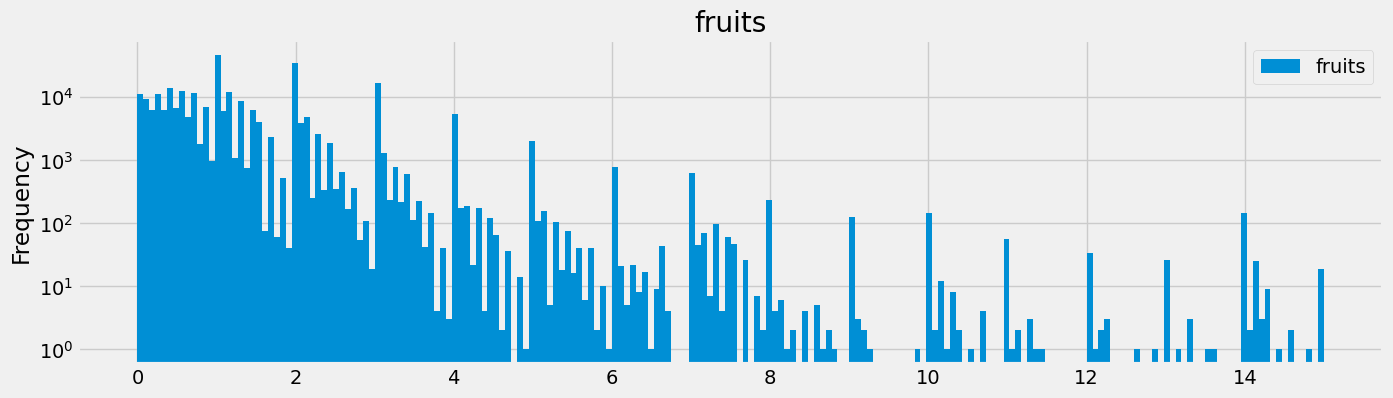


*** vegetables *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.020000,0.020000,0.020000,0.020000,0.030000,0.030000,0.030000,0.040000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.070000,0.070000,0.080000,0.090000,0.090000,0.100000,0.100000,0.100000,0.110000,0.110000,0.120000,0.120000,0.130000,0.130000,0.140000,0.140000,0.140000,0.150000,0.150000,0.160000,0.160000,0.170000,0.170000,0.170000,0.170000,0.180000,0.180000,0.190000,0.190000,0.200000,0.200000,0.200000,0.210000,0.210000,0.210000,0.220000,0.230000,0.230000,0.230000,0.240000,0.240000,0.240000,0.250000,0.260000,0.260000,0.270000,0.270000,0.270000,0.280000,0.280000,0.290000,0.290000,0.290000,0.290000,0.300000,0.300000,0.300000,0.310000,0.310000,0.320000,0.320000,0.330000,0.330000,0.330000,0.330000,0.340000,0.340000,0.350000,0.350000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.400000,0.400000,0.400000,0.410000,0.410000,0.420000,0.420000,0.430000,0.430000,0.440000,0.440000,0.450000,0.450000,0.460000,0.460000,0.460000,0.470000,0.470000,0.480000,0.480000,0.490000,0.490000,0.500000,0.510000,0.520000,0.520000,0.530000,0.530000,0.540000,0.540000,0.550000,0.560000,0.560000,0.570000,0.570000,0.580000,0.580000,0.580000,0.590000,0.590000,0.600000,0.600000,0.610000,0.610000,0.620000,0.620000,0.630000,0.630000,0.640000,0.640000,0.640000,0.650000,0.650000,0.660000,0.660000,0.670000,0.670000,0.680000,0.680000,0.690000,0.700000,0.700000,0.710000,0.710000,0.710000,0.720000,0.720000,0.730000,0.730000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.770000,0.770000,0.780000,0.780000,0.790000,0.790000,0.800000,0.800000,0.810000,0.810000,0.820000,0.820000,0.830000,0.830000,0.840000,0.840000,0.850000,0.850000,0.860000,0.860000,0.860000,0.870000,0.870000,0.880000,0.880000,0.890000,0.890000,0.900000,0.900000,0.910000,0.910000,0.920000,0.920000,0.930000,0.930000,0.933333,0.935333,0.935667,0.940000,0.944000,0.948333,0.948667,0.950000,0.950000,0.952000,0.953000,0.957000,0.959333,0.960000,0.960000,0.960000,0.961667,0.962000,0.966667,0.967667,0.969000,0.970000,0.970000,0.973333,0.974333,0.977000,0.980000,0.980000,0.990000,0.999667,1.000000,1.001000,1.001333,1.002000,1.002333,1.002333,1.003333,1.003667,1.004333,1.004333,1.004667,1.005333,1.005667,1.006000,1.006333,1.006667,1.007000,1.007667,1.008000,1.009000,1.009333,1.009667,1.010000,1.010000,1.010333,1.010667,1.011000,1.011333,1.011667,1.012000,1.012333,1.013000,1.013333,1.013667,1.014000,1.014333,1.015000,1.015333,1.015667,1.016333,1.016667,1.017333,1.017667,1.018000,1.018667,1.019000,1.019333,1.020000,1.020000,1.020000,1.020333,1.020667,1.021000,1.021333,1.021667,1.022000,1.022333,1.022667,1.023000,1.023333,1.023667,1.024000,1.024333,1.024667,1.025000,1.025333,1.025667,1.026000,1.026667,1.027000,1.027667,1.028000,1.028333,1.028667,1.029000,1.029333,1.029667,1.030000,1.030000,1.030333,1.030667,1.031000,1.031333,1.032000,1.032333,1.032667,1.033000,1.033333,1.033667,1.034000,1.034000,1.034333,1.035333,1.035667,1.036667,1.037667,1.038000,1.038333,1.038667,1.039000,1.040000,1.040000,1.040333,1.040667,1.041000,1.042000,1.042333,1.042667,1.043000,1.043333,1.043667,1.044333,1.044667,1.045333,1.045667,1.046000,1.047333,1.047667,1.048667,1.049000,1.050000,1.051000,1.052333,1.052667,1.053333,1.053667,1.055667,1.056667,1.057000,1.057333,1.057667,1.058667,1.060000,1.060000,1.061667,1.062000,1.064333,1.066667,1.070000,1.070000,1.080000,1.090000,1.100000,1.100000,1.110000,1.120000,1.120000,1.130000,1.130000,1.140000,1.140000,1.140000,1.150000,1.150000,1.160000,1.170000,1.170000,1.180000,1.190000,1.200000,1.200000,1.210000,1.210000,1.220000,1.230000,1.230000,1.240000,1.240000,1.250000,1.260000,1.260000,1.270000,1.280000,1.280000,1.290000,1.290000,1.290000,1.300000,1.300000,1.310000,1.310000,1.320000,1.320000,1.330000,1.330000,1.330000,1.340000,1.340000,1.350000,1.360000,1.360000,1.370000,1.380000,1.380000,1.390000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.440000,1.450000,1.450000,1.460000,1.460000,1.470000,1.480000,1.490000,1.490000,1.5

,0.000000,0.020000,0.020000,0.020000,0.020000,0.030000,0.030000,0.030000,0.040000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.070000,0.070000,0.080000,0.090000,0.090000,0.100000,0.100000,0.100000,0.110000,0.110000,0.120000,0.120000,0.130000,0.130000,0.140000,0.140000,0.140000,0.150000,0.150000,0.160000,0.160000,0.170000,0.170000,0.170000,0.170000,0.180000,0.180000,0.190000,0.190000,0.200000,0.200000,0.200000,0.210000,0.210000,0.210000,0.220000,0.230000,0.230000,0.230000,0.240000,0.240000,0.240000,0.250000,0.260000,0.260000,0.270000,0.270000,0.270000,0.280000,0.280000,0.290000,0.290000,0.290000,0.290000,0.300000,0.300000,0.300000,0.310000,0.310000,0.320000,0.320000,0.330000,0.330000,0.330000,0.330000,0.340000,0.340000,0.350000,0.350000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.400000,0.400000,0.400000,0.410000,0.410000,0.420000,0.420000,0.430000,0.430000,0.440000,0.440000,0.450000,0.450000,0.460000,0.460000,0.460000,0.470000,0.470000,0.480000,0.480000,0.490000,0.490000,0.500000,0.510000,0.520000,0.520000,0.530000,0.530000,0.540000,0.540000,0.550000,0.560000,0.560000,0.570000,0.570000,0.580000,0.580000,0.580000,0.590000,0.590000,0.600000,0.600000,0.610000,0.610000,0.620000,0.620000,0.630000,0.630000,0.640000,0.640000,0.640000,0.650000,0.650000,0.660000,0.660000,0.670000,0.670000,0.680000,0.680000,0.690000,0.700000,0.700000,0.710000,0.710000,0.710000,0.720000,0.720000,0.730000,0.730000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.770000,0.770000,0.780000,0.780000,0.790000,0.790000,0.800000,0.800000,0.810000,0.810000,0.820000,0.820000,0.830000,0.830000,0.840000,0.840000,0.850000,0.850000,0.860000,0.860000,0.860000,0.870000,0.870000,0.880000,0.880000,0.890000,0.890000,0.900000,0.900000,0.910000,0.910000,0.920000,0.920000,0.930000,0.930000,0.933333,0.935333,0.935667,0.940000,0.944000,0.948333,0.948667,0.950000,0.950000,0.952000,0.953000,0.957000,0.959333,0.960000,0.960000,0.960000,0.961667,0.962000,0.966667,0.967667,0.969000,0.970000,0.970000,0.973333,0.974333,0.977000,0.980000,0.980000,0.990000,0.999667,1.000000,1.001000,1.001333,1.002000,1.002333,1.002333,1.003333,1.003667,1.004333,1.004333,1.004667,1.005333,1.005667,1.006000,1.006333,1.006667,1.007000,1.007667,1.008000,1.009000,1.009333,1.009667,1.010000,1.010000,1.010333,1.010667,1.011000,1.011333,1.011667,1.012000,1.012333,1.013000,1.013333,1.013667,1.014000,1.014333,1.015000,1.015333,1.015667,1.016333,1.016667,1.017333,1.017667,1.018000,1.018667,1.019000,1.019333,1.020000,1.020000,1.020000,1.020333,1.020667,1.021000,1.021333,1.021667,1.022000,1.022333,1.022667,1.023000,1.023333,1.023667,1.024000,1.024333,1.024667,1.025000,1.025333,1.025667,1.026000,1.026667,1.027000,1.027667,1.028000,1.028333,1.028667,1.029000,1.029333,1.029667,1.030000,1.030000,1.030333,1.030667,1.031000,1.031333,1.032000,1.032333,1.032667,1.033000,1.033333,1.033667,1.034000,1.034000,1.034333,1.035333,1.035667,1.036667,1.037667,1.038000,1.038333,1.038667,1.039000,1.040000,1.040000,1.040333,1.040667,1.041000,1.042000,1.042333,1.042667,1.043000,1.043333,1.043667,1.044333,1.044667,1.045333,1.045667,1.046000,1.047333,1.047667,1.048667,1.049000,1.050000,1.051000,1.052333,1.052667,1.053333,1.053667,1.055667,1.056667,1.057000,1.057333,1.057667,1.058667,1.060000,1.060000,1.061667,1.062000,1.064333,1.066667,1.070000,1.070000,1.080000,1.090000,1.100000,1.100000,1.110000,1.120000,1.120000,1.130000,1.130000,1.140000,1.140000,1.140000,1.150000,1.150000,1.160000,1.170000,1.170000,1.180000,1.190000,1.200000,1.200000,1.210000,1.210000,1.220000,1.230000,1.230000,1.240000,1.240000,1.250000,1.260000,1.260000,1.270000,1.280000,1.280000,1.290000,1.290000,1.290000,1.300000,1.300000,1.310000,1.310000,1.320000,1.320000,1.330000,1.330000,1.330000,1.340000,1.340000,1.350000,1.360000,1.360000,1.370000,1.380000,1.380000,1.390000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.440000,1.450000,1.450000,1.460000,1.460000,1.470000,1.480000,1.490000,1.490000,1.5

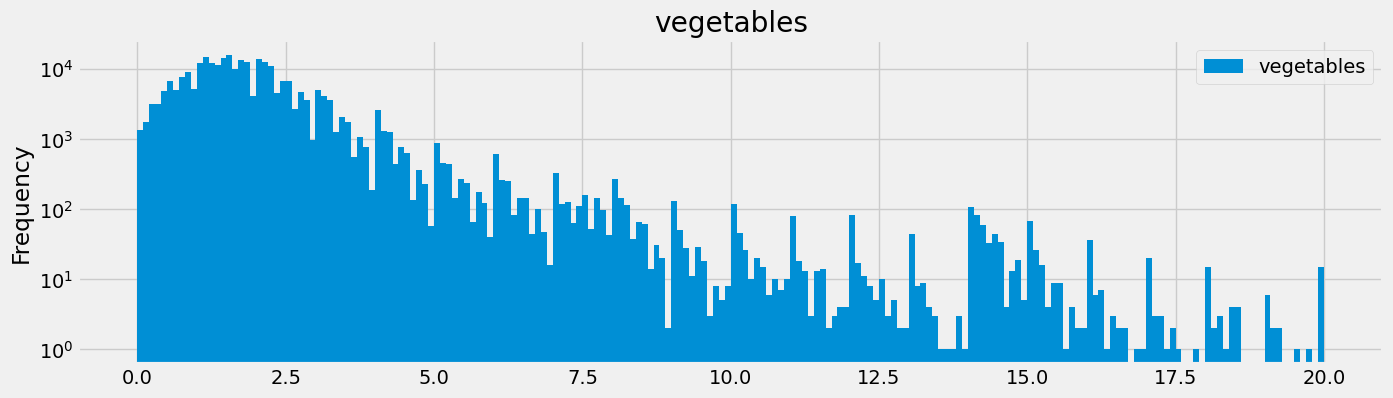


*** alcohol *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.933333,0.966667,0.967143,0.980000,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,1.933333,2.000000,2.066667,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000,8.167143,8.332857,8.400000,8.571429,8.667143,9.000000,9.142857,9.200000,9.285714,9.332857,9.428571,9.600000,9.667143,9.800000,10.000000,10.285714,10.667143,10.714286,10.767143,10.800000,11.000000,11.200000,11.428571,11.600000,11.667143,12.000000,12.500000,12.800000,12.857143,13.000000,13.067143,13.332857,13.532857,13.714286,14.000000,14.285714,15.000000,15.332857,16.000000,16.667143,16.800000,17.000000,17.142857,17.400000,17.857143,18.000000,18.285714,18.400000,19.000000,20.000000,20.832857,21.428571,21.714286,22.200000,22.500000,22.667143,24.000000,25.000000,25.332857,26.132857,26.667143,32.571429,34.285714,35.000000,35.714286,36.000000,37.500000,41.067143,43.428571,50.000000
count,127640,15513,12416,5978,9526,6343,3639,5381,776,3838,6304,1493,5439,13,3090,3385,20,878,3300,1787,17,5325,742,3,5106,418,1515,47,8,1382,1242,3815,54,113,529,2,1,66,1,8584,341,4,25,1611,111,433,5,1126,11,2503,187,1296,66,711,22,2,323,24,1151,10,1307,30,83,2,346,2,113,1,6107,1,27,73,539,2,19,6,326,7,57,97,472,2,2,274,24,315,39,138,2,260,47,14,2305,1,2,2,1,50,6,365,3,195,8,28,113,33,7,2,47,1,6,17,1060,63,7,5,136,8,3,19,1,24,2,36,1,24,10,589,1,1,71,6,38,3,4,2,29,38,11,6,584,1,4,14,5,50,3,18,2,109,14,4,1,1,8,31,3,1,1,142,1,9,2,18,4,27,5,2,1,3,1,3,1,1,146,8,2,8,1,2,3,2,3,2,1,114,2,1,10,7,1,12,1,1,6,8,42,2,7,4,1,1,3,1,4,10,1,1,1,24,2,2,1,1,1,1,13,7,1,1,2,1,1,1,1,2,1,1,1,2


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.933333,0.966667,0.967143,0.980000,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,1.933333,2.000000,2.066667,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000,8.167143,8.332857,8.400000,8.571429,8.667143,9.000000,9.142857,9.200000,9.285714,9.332857,9.428571,9.600000,9.667143,9.800000,10.000000,10.285714,10.667143,10.714286,10.767143,10.800000,11.000000,11.200000,11.428571,11.600000,11.667143,12.000000,12.500000,12.800000,12.857143,13.000000,13.067143,13.332857,13.532857,13.714286,14.000000,14.285714,15.000000,15.332857,16.000000,16.667143,16.800000,17.000000,17.142857,17.400000,17.857143,18.000000,18.285714,18.400000,19.000000,20.000000,20.832857,21.428571,21.714286,22.200000,22.500000,22.667143,24.000000,25.000000,25.332857,26.132857,26.667143,32.571429,34.285714,35.000000,35.714286,36.000000,37.500000,41.067143,43.428571,50.000000,52.267143,53.667143,56.000000,63.332857,65.142857,70.932857,76.000000
count,127640,15513,12416,5978,9526,6343,3639,5381,776,3838,6304,1493,5439,13,3090,3385,20,878,3300,1787,17,5325,742,3,5106,418,1515,47,8,1382,1242,3815,54,113,529,2,1,66,1,8584,341,4,25,1611,111,433,5,1126,11,2503,187,1296,66,711,22,2,323,24,1151,10,1307,30,83,2,346,2,113,1,6107,1,27,73,539,2,19,6,326,7,57,97,472,2,2,274,24,315,39,138,2,260,47,14,2305,1,2,2,1,50,6,365,3,195,8,28,113,33,7,2,47,1,6,17,1060,63,7,5,136,8,3,19,1,24,2,36,1,24,10,589,1,1,71,6,38,3,4,2,29,38,11,6,584,1,4,14,5,50,3,18,2,109,14,4,1,1,8,31,3,1,1,142,1,9,2,18,4,27,5,2,1,3,1,3,1,1,146,8,2,8,1,2,3,2,3,2,1,114,2,1,10,7,1,12,1,1,6,8,42,2,7,4,1,1,3,1,4,10,1,1,1,24,2,2,1,1,1,1,13,7,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,2


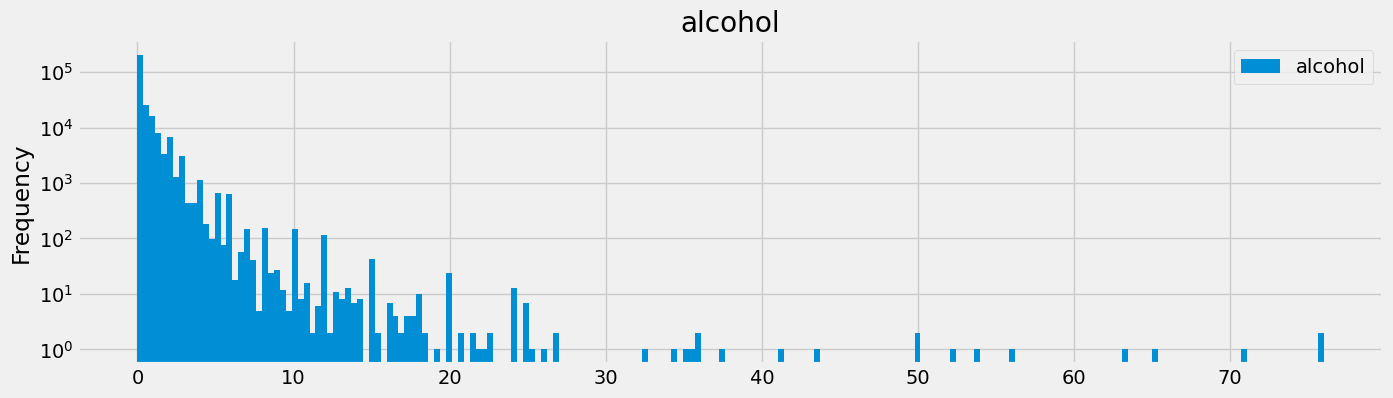

In [74]:
# Remove outliers in fruits and vegetables seen in the histograms (multiple of 99)


# Vegetables
data1['vegetables'] = data1['vegetables'].replace(4 * 99, np.nan)
data1.dropna(subset='vegetables', inplace=True)
for i in [3, 2, 1]:
    data1['vegetables'] = data1['vegetables'].where(data1['vegetables'] < i * 99,
                                                    data1['vegetables'] - i * 99)

# Fruits
data1['fruits'] = data1['fruits'].replace(2 * 99, np.nan)
data1.dropna(subset='fruits', inplace=True)
data1['fruits'] = data1['fruits'].where(data1['fruits'] < 1 * 99,
                                        data1['fruits'] - 1 * 99)


# There are also peaks at 30/31 and 60 as if they also mixed nb of fruits per day and per month!
# make the correction as not realistic to eat 30 or 60 fruits/vegetables per day
for col in ['fruits', 'vegetables', 'alcohol']:
    mask = (data1[col] < 28) | (data1[col] > 32) 
    data1[col] = data1[col].where(mask, data1[col] / 30)
    mask = (data1[col] < 58) | (data1[col] > 62) 
    data1[col] = data1[col].where(mask, data1[col] / 30)
    mask = (data1[col] < 88) | (data1[col] > 92) 
    data1[col] = data1[col].where(mask, data1[col] / 30)
# maybe just divide by 30 all numbers > 30 ?
    
    
# importlib.reload(ef)
ef.draw_histogram(data1[['fruits', 'vegetables', 'alcohol']], bins=200, logy=True)


In [68]:
# sorted_values = pd.DataFrame(data1['age'].value_counts()).sort_index() #sort_values()
# print('Min:')
# display(sorted_values[-10::-1].T.rename(index={'age':'count'}))
# print('Max:', sorted_values[-10::-1])

mask = data1['weight'] < 40
print('\n', len(data1[mask]))
display(data1[mask].head(10))

mask = data1['height'] > 2.1
print('\n', len(data1[mask]))
display(data1[mask].head(10))

mask = data1['fruits'] > 30
print('\n', len(data1[mask]))
display(data1[mask].head(10))

mask = data1['vegetables'] > 30
print('\n', len(data1[mask]))
display(data1[mask].head(10))

mask = data1['alcohol'] > 10
print('\n', len(data1[mask]))
display(data1[mask].head(10))



 238


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
0,1,F,5.0,no,no,no,yes,no,yes,no,no,yes,high-school,no,25-35k,32.6592,1.4994,yes,yes,white,72.0,underweight,0.000000,1.00,2.14,0,0
557,1,F,3.0,no,yes,yes,yes,no,no,no,no,yes,high-school,no,25-35k,33.1128,1.3470,yes,yes,white,77.0,underweight,0.000000,2.00,1.01,0,0
603,1,F,2.0,no,yes,yes,yes,no,no,no,no,yes,college,no,35-50k,34.0200,1.4486,no,yes,white,82.0,underweight,0.667143,3.00,1.28,0,0
3554,2,F,4.0,no,yes,no,no,no,no,no,no,yes,some college,no,35-50k,36.2880,1.4994,yes,no,indian,77.0,underweight,0.000000,1.86,1.28,0,0
3742,2,F,3.0,no,no,yes,no,yes,no,no,no,no,high-school,no,25-35k,38.5560,1.7028,yes,yes,white,72.0,underweight,2.000000,0.64,1.85,0,0
4019,2,F,1.0,no,yes,yes,yes,no,no,no,no,no,college,no,25-35k,34.4736,1.5250,yes,no,indian,72.0,underweight,0.000000,3.00,1.35,0,0
7037,4,F,1.0,no,yes,no,no,no,no,no,no,no,some college,no,50-75k,32.6592,1.4232,no,yes,white,72.0,underweight,0.000000,1.00,2.43,0,0
7423,4,F,2.0,no,yes,yes,no,no,no,no,no,no,some college,no,25-35k,32.6592,1.4740,no,yes,white,67.0,underweight,0.000000,2.00,2.43,0,0
7905,4,F,5.0,no,no,no,no,no,no,yes,no,yes,college,no,100-150k,34.0200,1.5758,yes,yes,white,57.0,underweight,0.000000,1.00,2.71,0,1
13350,4,F,2.0,no,yes,no,no,no,no,no,no,no,high-school,no,20-25k,38.1024,1.5758,no,yes,white,67.0,underweight,2.000000,0.17,3.00,0,0



 61


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
1686,1,M,3.0,yes,yes,no,no,no,yes,yes,no,no,high-school,no,15-20k,72.5760,2.1858,no,yes,black,27.0,underweight,0.000000,0.33,7.44,0,0
3629,2,M,4.0,no,no,yes,no,no,yes,yes,no,yes,some college,yes,50-75k,176.9040,2.1604,yes,yes,white,62.0,obese,0.000000,0.07,2.28,0,0
3723,2,M,3.0,no,yes,yes,yes,no,no,no,yes,yes,some college,no,>200k,111.1320,2.2366,no,no,white,67.0,normalweight,2.000000,1.10,1.21,0,0
3800,2,M,1.0,no,yes,no,no,no,no,no,no,no,high-school,no,10-15k,127.0080,2.1094,yes,no,multiracial,42.0,overweight,0.400000,1.02,2.05,0,0
16222,5,M,2.0,no,yes,yes,no,no,no,no,yes,no,college,yes,100-150k,79.3800,2.1094,yes,yes,multiracial,62.0,underweight,1.000000,1.14,0.31,0,0
16325,5,M,3.0,no,yes,no,no,no,yes,no,yes,no,some high-school,no,<10k,68.0400,2.2620,yes,yes,black,62.0,underweight,0.000000,1.00,1.14,0,0
17246,6,F,3.0,no,yes,no,no,no,no,no,no,no,kindergarten,no,<10k,79.8336,2.1350,no,yes,hispanic,82.0,underweight,0.000000,1.14,0.17,0,0
19155,6,M,5.0,no,yes,no,yes,no,no,no,yes,no,high-school,no,10-15k,89.8128,2.3382,no,yes,hispanic,82.0,underweight,0.000000,0.39,0.34,0,0
19688,6,F,2.0,no,no,no,no,no,yes,no,no,no,college,no,150-200k,104.3280,2.2874,no,yes,white,32.0,normalweight,0.332857,0.43,2.67,0,0
21143,6,F,3.0,no,yes,no,no,no,no,no,no,no,kindergarten,no,<10k,77.1120,2.1350,no,yes,hispanic,42.0,underweight,0.000000,4.00,2.36,0,0



 66


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
14801,5,M,3.0,no,yes,no,yes,no,no,no,no,yes,some college,no,25-35k,108.8640,1.9316,no,yes,white,82.0,overweight,0.000000,36.00,0.86,0,0
14959,5,F,4.0,yes,no,yes,yes,no,yes,no,no,yes,high-school,no,25-35k,58.9680,1.6520,no,yes,white,82.0,normalweight,0.000000,44.14,69.00,1,1
15155,5,F,2.0,no,yes,yes,yes,no,no,no,no,yes,some college,no,50-75k,68.9472,1.7028,yes,yes,white,67.0,normalweight,0.000000,80.02,1.87,0,0
15371,5,F,3.0,no,yes,yes,yes,no,no,no,no,yes,college,no,50-75k,54.4320,1.5250,no,yes,white,82.0,normalweight,0.000000,50.00,0.67,0,0
16715,5,F,3.0,no,no,yes,no,no,yes,yes,yes,yes,college,no,10-15k,140.1624,1.6520,no,yes,black,47.0,obese,0.832857,92.29,1.18,0,0
27703,8,M,3.0,no,yes,no,no,no,no,no,no,no,some high-school,no,50-75k,93.4416,1.8044,yes,yes,white,42.0,overweight,0.000000,52.00,1.30,0,0
28300,9,M,3.0,no,no,no,no,no,no,no,no,yes,college,yes,50-75k,63.5040,1.6266,no,yes,white,82.0,normalweight,0.142857,57.00,4.01,0,1
29369,9,M,5.0,no,yes,no,yes,no,no,no,no,yes,some college,yes,25-35k,90.7200,1.8044,no,yes,white,82.0,overweight,0.000000,33.00,2.50,0,1
32699,9,F,2.0,yes,yes,no,no,no,no,no,no,no,some college,no,35-50k,122.4720,1.7536,no,yes,other,21.0,obese,0.000000,35.00,3.00,0,0
36978,11,F,3.0,no,yes,no,yes,no,no,yes,no,no,college,no,>200k,90.7200,1.7282,no,yes,white,62.0,obese,1.867143,53.00,47.00,0,0



 247


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
13423,4,M,4.0,no,no,yes,no,no,no,no,no,no,elementary,yes,10-15k,112.4928,1.7536,yes,yes,white,77.0,obese,3.000000,0.030000,51.71,0,0
14959,5,F,4.0,yes,no,yes,yes,no,yes,no,no,yes,high-school,no,25-35k,58.9680,1.6520,no,yes,white,82.0,normalweight,0.000000,44.140000,69.00,1,1
15261,5,F,3.0,no,yes,yes,yes,no,no,no,no,yes,high-school,no,15-20k,77.1120,1.6266,yes,no,white,82.0,overweight,0.032857,0.000000,64.23,0,0
15298,5,F,3.0,yes,no,no,no,no,no,yes,no,yes,high-school,no,50-75k,95.2560,1.7282,yes,yes,white,32.0,obese,0.285714,2.000000,48.00,0,0
15314,5,M,3.0,no,no,yes,no,no,no,no,yes,no,high-school,no,50-75k,81.6480,1.8300,yes,yes,white,72.0,normalweight,1.332857,2.310000,40.15,1,0
15348,5,F,2.0,no,yes,yes,yes,yes,no,no,no,yes,college,no,50-75k,68.0400,1.6012,yes,yes,white,72.0,overweight,0.100000,2.290000,62.86,0,1
15351,5,F,2.0,no,yes,no,no,no,no,no,no,no,some college,no,75-100k,81.6480,1.5758,yes,no,white,62.0,obese,0.000000,2.000000,62.41,0,0
15841,5,M,2.0,no,yes,yes,no,no,no,no,no,no,college,no,100-150k,86.1840,1.8300,no,yes,white,62.0,overweight,0.332857,0.850000,32.28,0,0
16556,5,F,2.0,no,yes,no,no,no,no,yes,no,no,some college,no,50-75k,52.6176,1.6012,no,no,white,62.0,normalweight,0.000000,1.000667,32.23,0,0
16571,5,F,2.0,no,yes,no,yes,no,yes,no,no,yes,high-school,no,50-75k,73.4832,1.7028,no,yes,white,52.0,overweight,0.571429,15.570000,45.12,0,0



 406


,state_id,sex,general_health,med_cost_issue,physical_activity,blood_pressure,cholesterol,stroke,asthma,depression,diabete,arthritis,education,veteran,income,weight,height,smoked_100_cig,is_urban,race,age,bmi,alcohol,fruits,vegetables,cvd,cancer
928,1,M,1.0,no,yes,no,no,no,no,no,no,no,some college,no,50-75k,74.8440,1.9062,yes,no,white,37.0,normalweight,12.000000,0.20,1.67,0,0
1049,1,M,4.0,no,yes,yes,no,no,yes,yes,no,yes,college,no,100-150k,92.0808,1.8808,yes,yes,black,21.0,overweight,15.000000,0.00,2.14,0,0
1594,1,M,4.0,no,yes,no,no,no,no,no,no,yes,some college,no,50-75k,72.5760,1.8554,yes,yes,white,27.0,normalweight,12.000000,2.00,3.29,0,0
1818,1,M,1.0,no,yes,no,no,no,no,no,no,no,high-school,no,100-150k,71.6688,1.7282,yes,yes,indian,67.0,normalweight,15.000000,0.13,0.20,0,0
2829,1,M,2.0,no,yes,yes,no,no,no,no,no,no,some college,no,50-75k,97.5240,1.9062,yes,yes,black,52.0,overweight,11.428571,7.43,12.00,0,0
2996,1,M,1.0,no,no,yes,yes,no,no,no,no,no,high-school,no,15-20k,81.6480,1.8300,yes,yes,indian,57.0,normalweight,12.000000,0.03,1.16,0,0
3226,1,M,3.0,no,yes,no,no,no,no,yes,no,no,high-school,no,20-25k,72.5760,1.7028,yes,yes,hispanic,27.0,overweight,12.000000,0.14,0.63,0,0
3543,2,M,3.0,no,yes,yes,no,no,no,no,no,yes,some college,yes,35-50k,65.7720,1.7282,yes,no,white,67.0,normalweight,12.000000,5.03,0.09,0,0
3869,2,M,5.0,yes,yes,no,no,no,no,no,no,no,high-school,yes,<10k,90.7200,1.6012,yes,yes,indian,62.0,obese,12.000000,6.00,0.24,0,0
5206,2,F,2.0,no,yes,yes,no,no,no,no,no,no,college,no,75-100k,97.5240,1.6012,no,yes,indian,52.0,obese,20.000000,5.00,1.66,0,0


height [1.3, 2.1] .Removed: 0
weight [45, 220] .Removed: 0
vegetables [0, 20] .Removed: 0
fruits [0, 15] .Removed: 0
alcohol [0, 8] .Removed: 224

*** weight *** :
50 lower and 50 higher values with the associated count:


,45.0000,45.3600,45.8136,46.0000,46.2672,46.7208,47.0000,47.1744,47.6280,48.0000,48.0816,48.5352,48.9888,49.0000,49.4424,49.8960,50.0000
count,5,741,70,1,175,180,2,160,757,2,208,239,310,2,160,1750,13


,45.0000,45.3600,45.8136,46.0000,46.2672,46.7208,47.0000,47.1744,47.6280,48.0000,48.0816,48.5352,48.9888,49.0000,49.4424,49.8960,50.0000,50.3496,50.8032,51.0000,51.2568,51.7104,52.0000,52.1640,52.6176,53.0000,53.0712,53.5248,53.9784,54.0000,54.4320,54.8856,55.0000,55.3392,55.7928,56.0000,56.2464,56.7000,57.0000,57.1536,57.6072,58.0000,58.0608,58.5144,58.9680,59.0000,59.4216,59.8752,60.0000,60.3288,60.7824,61.0000,61.2360,61.6896,62.0000,62.1432,62.5968,63.0000,63.0504,63.5040,63.9576,64.0000,64.4112,64.8648,65.0000,65.3184,65.7720,66.0000,66.2256,66.6792,67.0000,67.1328,67.5864,68.0000,68.0400,68.4936,68.9472,69.0000,69.4008,69.8544,70.0000,70.3080,70.7616,71.0000,71.2152,71.6688,72.0000,72.1224,72.5760,73.0000,73.0296,73.4832,73.9368,74.0000,74.3904,74.8440,75.0000,75.2976,75.7512,76.0000,76.2048,76.6584,77.0000,77.1120,77.5656,78.0000,78.0192,78.4728,78.9264,79.0000,79.3800,79.8336,80.0000,80.2872,80.7408,81.0000,81.1944,81.6480,82.0000,82.1016,82.5552,83.0000,83.0088,83.4624,83.9160,84.0000,84.3696,84.8232,85.0000,85.2768,85.7304,86.0000,86.1840,86.6376,87.0000,87.0912,87.5448,87.9984,88.0000,88.4520,88.9056,89.0000,89.3592,89.8128,90.0000,90.2664,90.7200,91.0000,91.1736,91.6272,92.0000,92.0808,92.5344,92.9880,93.4416,93.8952,94.0000,94.3488,94.8024,95.0000,95.2560,95.7096,96.0000,96.1632,96.6168,97.0000,97.0704,97.5240,97.9776,98.0000,98.4312,98.8848,99.0000,99.3384,99.7920,100.0000,100.2456,100.6992,101.0000,101.1528,101.6064,102.0000,102.0600,102.5136,102.9672,103.0000,103.4208,103.8744,104.0000,104.3280,104.7816,105.0000,105.2352,105.6888,106.0000,106.1424,106.5960,107.0496,107.5032,107.9568,108.4104,108.8640,109.0000,109.3176,109.7712,110.0000,110.2248,110.6784,111.1320,111.5856,112.0000,112.0392,112.4928,112.9464,113.0000,113.4000,113.8536,114.3072,114.7608,115.0000,115.2144,115.6680,116.0000,116.1216,116.5752,117.0000,117.0288,117.4824,117.9360,118.0000,118.3896,118.8432,119.0000,119.2968,119.7504,120.0000,120.2040,120.6576,121.1112,121.5648,122.0184,122.4720,122.9256,123.3792,123.8328,124.2864,124.7400,125.1936,125.6472,126.0000,126.1008,126.5544,127.0000,127.0080,127.4616,127.9152,128.3688,128.8224,129.2760,129.7296,130.0000,130.1832,130.6368,131.0904,131.5440,131.9976,132.4512,132.9048,133.3584,133.8120,134.0000,134.2656,134.7192,135.0000,135.1728,135.6264,136.0800,136.5336,136.9872,137.4408,137.8944,138.0000,138.3480,138.8016,139.2552,139.7088,140.0000,140.1624,140.6160,141.0000,141.0696,141.5232,141.9768,142.4304,142.8840,143.3376,143.7912,144.2448,144.6984,145.1520,145.6056,146.0592,146.5128,146.9664,147.4200,147.8736,148.3272,148.7808,149.2344,149.6880,150.0000,150.1416,150.5952,151.0488,151.5024,151.9560,152.4096,152.8632,153.3168,153.7704,154.0000,154.2240,154.6776,155.1312,155.5848,156.0384,156.4920,156.9456,157.3992,157.8528,158.3064,158.7600,159.0000,159.2136,159.6672,160.0000,160.1208,160.5744,161.0280,161.4816,161.9352,162.3888,162.8424,163.2960,163.7496,164.2032,164.6568,165.0000,165.1104,165.5640,166.0176,166.4712,166.9248,167.3784,167.8320,168.2856,168.7392,169.1928,169.6464,170.1000,170.5536,171.0072,171.4608,171.9144,172.3680,172.8216,173.2752,173.7288,174.1824,174.6360,175.0896,175.5432,175.9968,176.0000,176.4504,176.9040,177.3576,177.8112,178.2648,178.7184,179.1720,179.6256,180.0000,180.0792,180.5328,180.9864,181.4400,181.8936,182.0000,182.3472,183.2544,183.7080,184.1616,184.6152,185.0000,185.0688,185.5224,185.9760,186.4296,186.8832,187.3368,187.7904,188.2440,188.6976,189.1512,189.6048,190.0584,190.5120,191.4192,191.8728,192.7800,193.6872,194.5944,195.0000,195.0480,195.5016,195.9552,197.3160,198.2232,199.1304,199.5840,200.0000,200.4912,200.9448,201.8520,202.7592,203.2128,203.6664,204.1200,205.0272,205.9344,206.3880,206.8416,207.7488,208.6560,209.5632,210.0168,210.9240,212.7384,213.1920,214.0992,215.0064,215.4600,215.9136,216.3672,217.7280,219.0888,219.5424,219.9960
count,5,741,70,1,175,180,2,160,757,2,208,239,310,2,160,1750,13,138,557,3,262,357,9,1844,350,4,390,783,260,10,3765,243,14,600,564,8,55

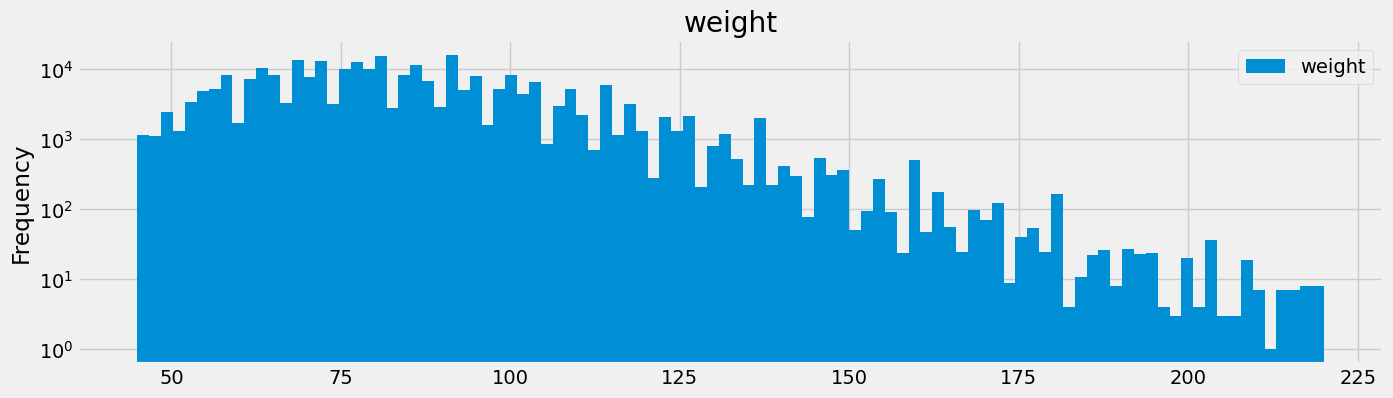


*** height *** :
50 lower and 50 higher values with the associated count:


,1.3000,1.3216,1.3400,1.3470,1.3500,1.3724,1.3978,1.4000,1.4232,1.4300,1.4400,1.4486,1.4500,1.4600,1.4700,1.4740,1.4800,1.4900,1.4994,1.5000,1.5100,1.5200,1.5250,1.5300,1.5400,1.5500,1.5504,1.5600,1.5700,1.5758,1.5800,1.5900,1.6000,1.6012,1.6100,1.6200,1.6266,1.6300,1.6400,1.6500,1.6520,1.6600,1.6700,1.6774,1.6800,1.6900,1.7000,1.7028,1.7100,1.7200,1.7282,1.7300,1.7400,1.7500,1.7536,1.7600,1.7700,1.7790,1.7800,1.7900,1.8000,1.8044,1.8100,1.8200,1.8300,1.8400,1.8500,1.8554,1.8600,1.8700,1.8800,1.8808,1.9000,1.9062,1.9316,1.9500,1.9570,1.9700,1.9800,1.9824,2.0000,2.0078,2.0332,2.0500,2.0586,2.0600,2.0840
count,5,16,1,66,4,40,93,11,224,3,3,455,9,1,3,851,3,11,2489,58,17,38,8386,24,14,55,8988,29,24,17581,22,15,106,18845,16,29,23567,35,31,89,21274,20,32,24358,39,21,98,21848,12,32,20703,23,18,66,19180,20,13,21424,30,6,44,16375,5,8,18761,2,13,9380,4,8,3,7627,6,4291,2612,3,1130,1,1,565,2,216,155,2,45,1,19


,1.3000,1.3216,1.3400,1.3470,1.3500,1.3724,1.3978,1.4000,1.4232,1.4300,1.4400,1.4486,1.4500,1.4600,1.4700,1.4740,1.4800,1.4900,1.4994,1.5000,1.5100,1.5200,1.5250,1.5300,1.5400,1.5500,1.5504,1.5600,1.5700,1.5758,1.5800,1.5900,1.6000,1.6012,1.6100,1.6200,1.6266,1.6300,1.6400,1.6500,1.6520,1.6600,1.6700,1.6774,1.6800,1.6900,1.7000,1.7028,1.7100,1.7200,1.7282,1.7300,1.7400,1.7500,1.7536,1.7600,1.7700,1.7790,1.7800,1.7900,1.8000,1.8044,1.8100,1.8200,1.8300,1.8400,1.8500,1.8554,1.8600,1.8700,1.8800,1.8808,1.9000,1.9062,1.9316,1.9500,1.9570,1.9700,1.9800,1.9824,2.0000,2.0078,2.0332,2.0500,2.0586,2.0600,2.0840
count,5,16,1,66,4,40,93,11,224,3,3,455,9,1,3,851,3,11,2489,58,17,38,8386,24,14,55,8988,29,24,17581,22,15,106,18845,16,29,23567,35,31,89,21274,20,32,24358,39,21,98,21848,12,32,20703,23,18,66,19180,20,13,21424,30,6,44,16375,5,8,18761,2,13,9380,4,8,3,7627,6,4291,2612,3,1130,1,1,565,2,216,155,2,45,1,19


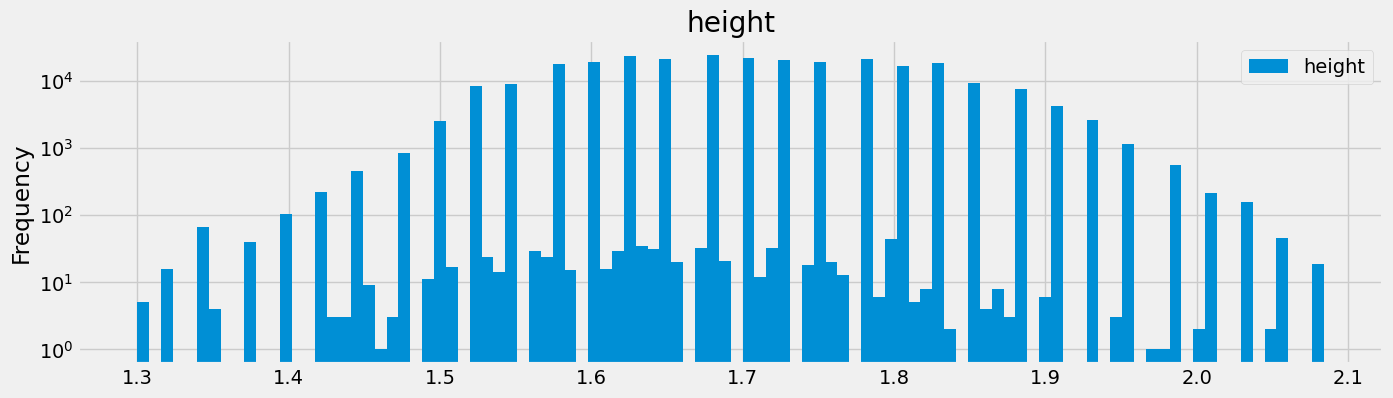


*** alcohol *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.933333,0.966667,0.967143,0.980000,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,1.933333,2.000000,2.066667,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000
count,127600,15509,12415,5977,9525,6343,3639,5381,776,3836,6304,1493,5437,13,3089,3385,20,878,3300,1787,17,5324,742,3,5106,418,1515,47,8,1382,1242,3815,54,113,529,2,1,66,1,8583,341,4,25,1611,111,433,5,1126,11,2503,187,1296,66,711,22,2,322,24,1151,10,1306,30,83,2,346,2,113,1,6107,1,27,73,539,2,19,6,326,7,57,97,472,2,2,274,24,315,39,138,2,260,47,14,2304,1,2,2,1,50,6,365,3,195,8,28,113,33,7,2,47,1,6,17,1060,63,7,5,136,8,3,19,1,24,2,36,1,24,10,589,1,1,71,5,38,3,4,2,29,38,11,6,584,1,4,14,5,50,3,18,2,109,14,4,1,1,8,31,3,1,1,142


,0.000000,0.032857,0.067143,0.100000,0.132857,0.142857,0.167143,0.200000,0.232857,0.267143,0.285714,0.300000,0.332857,0.367143,0.400000,0.428571,0.432857,0.467143,0.500000,0.532857,0.567143,0.571429,0.600000,0.632857,0.667143,0.700000,0.714286,0.732857,0.767143,0.800000,0.832857,0.857143,0.867143,0.900000,0.932857,0.933333,0.966667,0.967143,0.980000,1.000000,1.067143,1.100000,1.132857,1.142857,1.167143,1.200000,1.267143,1.285714,1.300000,1.332857,1.400000,1.428571,1.467143,1.500000,1.532857,1.571429,1.600000,1.632857,1.667143,1.700000,1.714286,1.732857,1.800000,1.857143,1.867143,1.900000,1.932857,1.933333,2.000000,2.066667,2.100000,2.132857,2.142857,2.167143,2.200000,2.267143,2.285714,2.300000,2.332857,2.400000,2.500000,2.532857,2.567143,2.571429,2.600000,2.667143,2.700000,2.800000,2.832857,2.857143,2.900000,2.932857,3.000000,3.032857,3.067143,3.142857,3.167143,3.200000,3.267143,3.332857,3.400000,3.428571,3.467143,3.500000,3.571429,3.600000,3.667143,3.714286,3.732857,3.800000,3.857143,3.867143,4.000000,4.167143,4.200000,4.267143,4.285714,4.332857,4.400000,4.500000,4.532857,4.571429,4.600000,4.667143,4.714286,4.800000,4.832857,5.000000,5.100000,5.132857,5.142857,5.200000,5.332857,5.400000,5.500000,5.571429,5.600000,5.714286,5.800000,5.832857,6.000000,6.067143,6.400000,6.428571,6.532857,6.667143,6.767143,6.857143,6.932857,7.000000,7.142857,7.200000,7.285714,7.400000,7.467143,7.500000,7.714286,7.732857,7.857143,8.000000
count,127600,15509,12415,5977,9525,6343,3639,5381,776,3836,6304,1493,5437,13,3089,3385,20,878,3300,1787,17,5324,742,3,5106,418,1515,47,8,1382,1242,3815,54,113,529,2,1,66,1,8583,341,4,25,1611,111,433,5,1126,11,2503,187,1296,66,711,22,2,322,24,1151,10,1306,30,83,2,346,2,113,1,6107,1,27,73,539,2,19,6,326,7,57,97,472,2,2,274,24,315,39,138,2,260,47,14,2304,1,2,2,1,50,6,365,3,195,8,28,113,33,7,2,47,1,6,17,1060,63,7,5,136,8,3,19,1,24,2,36,1,24,10,589,1,1,71,5,38,3,4,2,29,38,11,6,584,1,4,14,5,50,3,18,2,109,14,4,1,1,8,31,3,1,1,142


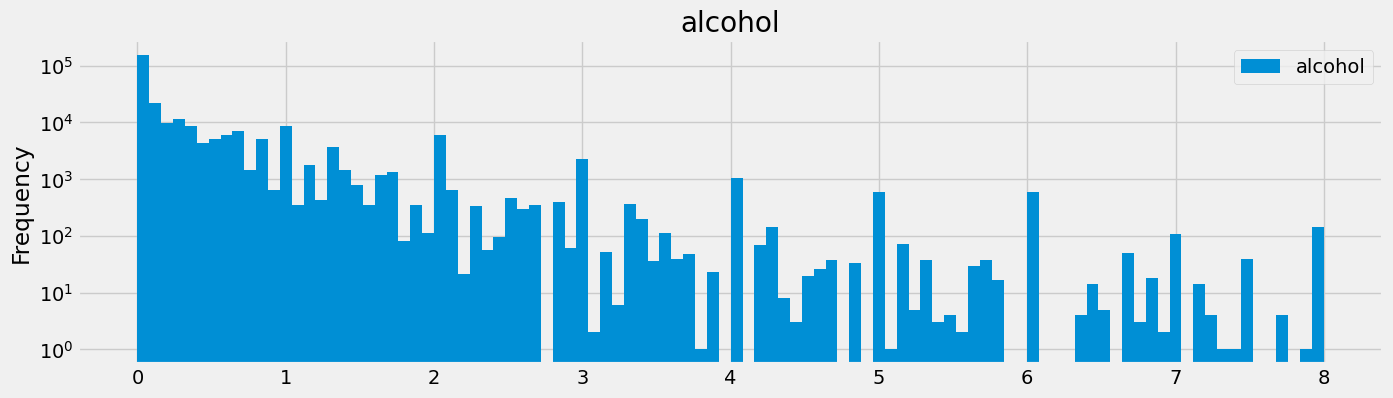


*** fruits *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.020000,0.020000,0.030000,0.030000,0.040000,0.050000,0.060000,0.070000,0.070000,0.090000,0.100000,0.100000,0.120000,0.130000,0.130000,0.140000,0.140000,0.150000,0.160000,0.170000,0.170000,0.190000,0.200000,0.200000,0.210000,0.220000,0.230000,0.230000,0.240000,0.250000,0.260000,0.270000,0.270000,0.280000,0.290000,0.290000,0.300000,0.310000,0.320000,0.330000,0.330000,0.340000,0.350000,0.360000,0.370000,0.390000,0.400000,0.400000,0.410000,0.420000,0.430000,0.430000,0.440000,0.450000,0.460000,0.470000,0.470000,0.490000,0.500000,0.510000,0.520000,0.530000,0.530000,0.540000,0.550000,0.560000,0.570000,0.570000,0.580000,0.590000,0.600000,0.610000,0.620000,0.630000,0.640000,0.660000,0.670000,0.670000,0.690000,0.700000,0.710000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000,0.830000,0.840000,0.850000,0.860000,0.860000,0.870000,0.880000,0.890000,0.900000,0.910000,0.920000,0.930000,0.933333,0.938000,0.940000,0.950000,0.957000,0.960000,0.970000,0.980000,1.000000,1.000667,1.001000,1.002333,1.003333,1.004333,1.004667,1.005667,1.006667,1.007667,1.009000,1.009667,1.010000,1.011000,1.013333,1.014333,1.016667,1.019000,1.020000,1.022333,1.023667,1.026667,1.028667,1.030000,1.033333,1.038000,1.040000,1.047667,1.060000,1.066667,1.070000,1.090000,1.100000,1.110000,1.120000,1.130000,1.140000,1.150000,1.160000,1.170000,1.180000,1.190000,1.200000,1.210000,1.220000,1.230000,1.240000,1.260000,1.270000,1.280000,1.290000,1.300000,1.310000,1.320000,1.330000,1.340000,1.350000,1.360000,1.370000,1.380000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.450000,1.460000,1.470000,1.500000,1.520000,1.530000,1.540000,1.560000,1.570000,1.580000,1.600000,1.610000,1.620000,1.630000,1.640000,1.660000,1.670000,1.680000,1.690000,1.700000,1.710000,1.710000,1.720000,1.730000,1.740000,1.750000,1.760000,1.770000,1.780000,1.790000,1.800000,1.810000,1.830000,1.840000,1.850000,1.860000,1.870000,1.880000,1.900000,1.910000,1.930000,1.940000,1.960000,1.970000,2.000000,2.004667,2.005667,2.020000,2.030000,2.033333,2.040000,2.060000,2.070000,2.090000,2.100000,2.110000,2.120000,2.130000,2.140000,2.140000,2.160000,2.170000,2.190000,2.200000,2.210000,2.230000,2.240000,2.260000,2.270000,2.280000,2.290000,2.300000,2.310000,2.330000,2.340000,2.350000,2.370000,2.400000,2.410000,2.420000,2.430000,2.470000,2.500000,2.520000,2.530000,2.570000,2.590000,2.600000,2.610000,2.640000,2.660000,2.670000,2.690000,2.700000,2.710000,2.730000,2.760000,2.770000,2.800000,2.810000,2.820000,2.830000,2.840000,2.850000,2.860000,2.860000,2.870000,2.880000,2.890000,2.900000,2.930000,2.943000,2.960000,2.966667,2.990000,3.000000,3.020000,3.030000,3.033333,3.038000,3.040000,3.047667,3.066667,3.070000,3.100000,3.130000,3.140000,3.150000,3.160000,3.170000,3.190000,3.200000,3.210000,3.230000,3.270000,3.280000,3.290000,3.300000,3.300000,3.320000,3.330000,3.340000,3.360000,3.370000,3.400000,3.420000,3.430000,3.440000,3.450000,3.470000,3.500000,3.530000,3.570000,3.590000,3.600000,3.630000,3.640000,3.670000,3.700000,3.710000,3.730000,3.740000,3.800000,3.830000,3.860000,3.870000,3.970000,4.000000,4.010000,4.020000,4.030000,4.070000,4.100000,4.130000,4.140000,4.170000,4.200000,4.230000,4.270000,4.280000,4.290000,4.300000,4.310000,4.320000,4.330000,4.340000,4.360000,4.390000,4.400000,4.430000,4.460000,4.470000,4.500000,4.570000,4.580000,4.670000,4.710000,4.720000,4.800000,4.830000,4.860000,4.870000,4.930000,5.000000,5.010000,5.020000,5.030000,5.070000,5.100000,5.130000,5.140000,5.170000,5.200000,5.230000,5.270000,5.290000,5.300000,5.330000,5.400000,5.430000,5.440000,5.500000,5.570000,5.670000,5.710000,5.720000,5.830000,5.860000,5.930000,6.000000,6.020000,6.030000,6.070000,6.100000,6.130000,6.140000,6.170000,6.200000,6.230000,6.270000,6.290000,6.300000,6.310000,6.430000,6.500000,6.530000,6.570000,6.600000,6.670000,6.710000,7.000000,7.020000,7.030000,7.070000,7.100000,7.130000,7.140000,7.140000,7.150000,7.170000,7.200000,7.230000,7.2

,0.000000,0.020000,0.020000,0.030000,0.030000,0.040000,0.050000,0.060000,0.070000,0.070000,0.090000,0.100000,0.100000,0.120000,0.130000,0.130000,0.140000,0.140000,0.150000,0.160000,0.170000,0.170000,0.190000,0.200000,0.200000,0.210000,0.220000,0.230000,0.230000,0.240000,0.250000,0.260000,0.270000,0.270000,0.280000,0.290000,0.290000,0.300000,0.310000,0.320000,0.330000,0.330000,0.340000,0.350000,0.360000,0.370000,0.390000,0.400000,0.400000,0.410000,0.420000,0.430000,0.430000,0.440000,0.450000,0.460000,0.470000,0.470000,0.490000,0.500000,0.510000,0.520000,0.530000,0.530000,0.540000,0.550000,0.560000,0.570000,0.570000,0.580000,0.590000,0.600000,0.610000,0.620000,0.630000,0.640000,0.660000,0.670000,0.670000,0.690000,0.700000,0.710000,0.710000,0.720000,0.730000,0.740000,0.750000,0.760000,0.770000,0.780000,0.790000,0.800000,0.810000,0.820000,0.830000,0.830000,0.840000,0.850000,0.860000,0.860000,0.870000,0.880000,0.890000,0.900000,0.910000,0.920000,0.930000,0.933333,0.938000,0.940000,0.950000,0.957000,0.960000,0.970000,0.980000,1.000000,1.000667,1.001000,1.002333,1.003333,1.004333,1.004667,1.005667,1.006667,1.007667,1.009000,1.009667,1.010000,1.011000,1.013333,1.014333,1.016667,1.019000,1.020000,1.022333,1.023667,1.026667,1.028667,1.030000,1.033333,1.038000,1.040000,1.047667,1.060000,1.066667,1.070000,1.090000,1.100000,1.110000,1.120000,1.130000,1.140000,1.150000,1.160000,1.170000,1.180000,1.190000,1.200000,1.210000,1.220000,1.230000,1.240000,1.260000,1.270000,1.280000,1.290000,1.300000,1.310000,1.320000,1.330000,1.340000,1.350000,1.360000,1.370000,1.380000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.450000,1.460000,1.470000,1.500000,1.520000,1.530000,1.540000,1.560000,1.570000,1.580000,1.600000,1.610000,1.620000,1.630000,1.640000,1.660000,1.670000,1.680000,1.690000,1.700000,1.710000,1.710000,1.720000,1.730000,1.740000,1.750000,1.760000,1.770000,1.780000,1.790000,1.800000,1.810000,1.830000,1.840000,1.850000,1.860000,1.870000,1.880000,1.900000,1.910000,1.930000,1.940000,1.960000,1.970000,2.000000,2.004667,2.005667,2.020000,2.030000,2.033333,2.040000,2.060000,2.070000,2.090000,2.100000,2.110000,2.120000,2.130000,2.140000,2.140000,2.160000,2.170000,2.190000,2.200000,2.210000,2.230000,2.240000,2.260000,2.270000,2.280000,2.290000,2.300000,2.310000,2.330000,2.340000,2.350000,2.370000,2.400000,2.410000,2.420000,2.430000,2.470000,2.500000,2.520000,2.530000,2.570000,2.590000,2.600000,2.610000,2.640000,2.660000,2.670000,2.690000,2.700000,2.710000,2.730000,2.760000,2.770000,2.800000,2.810000,2.820000,2.830000,2.840000,2.850000,2.860000,2.860000,2.870000,2.880000,2.890000,2.900000,2.930000,2.943000,2.960000,2.966667,2.990000,3.000000,3.020000,3.030000,3.033333,3.038000,3.040000,3.047667,3.066667,3.070000,3.100000,3.130000,3.140000,3.150000,3.160000,3.170000,3.190000,3.200000,3.210000,3.230000,3.270000,3.280000,3.290000,3.300000,3.300000,3.320000,3.330000,3.340000,3.360000,3.370000,3.400000,3.420000,3.430000,3.440000,3.450000,3.470000,3.500000,3.530000,3.570000,3.590000,3.600000,3.630000,3.640000,3.670000,3.700000,3.710000,3.730000,3.740000,3.800000,3.830000,3.860000,3.870000,3.970000,4.000000,4.010000,4.020000,4.030000,4.070000,4.100000,4.130000,4.140000,4.170000,4.200000,4.230000,4.270000,4.280000,4.290000,4.300000,4.310000,4.320000,4.330000,4.340000,4.360000,4.390000,4.400000,4.430000,4.460000,4.470000,4.500000,4.570000,4.580000,4.670000,4.710000,4.720000,4.800000,4.830000,4.860000,4.870000,4.930000,5.000000,5.010000,5.020000,5.030000,5.070000,5.100000,5.130000,5.140000,5.170000,5.200000,5.230000,5.270000,5.290000,5.300000,5.330000,5.400000,5.430000,5.440000,5.500000,5.570000,5.670000,5.710000,5.720000,5.830000,5.860000,5.930000,6.000000,6.020000,6.030000,6.070000,6.100000,6.130000,6.140000,6.170000,6.200000,6.230000,6.270000,6.290000,6.300000,6.310000,6.430000,6.500000,6.530000,6.570000,6.600000,6.670000,6.710000,7.000000,7.020000,7.030000,7.070000,7.100000,7.130000,7.140000,7.140000,7.150000,7.170000,7.200000,7.230000,7.2

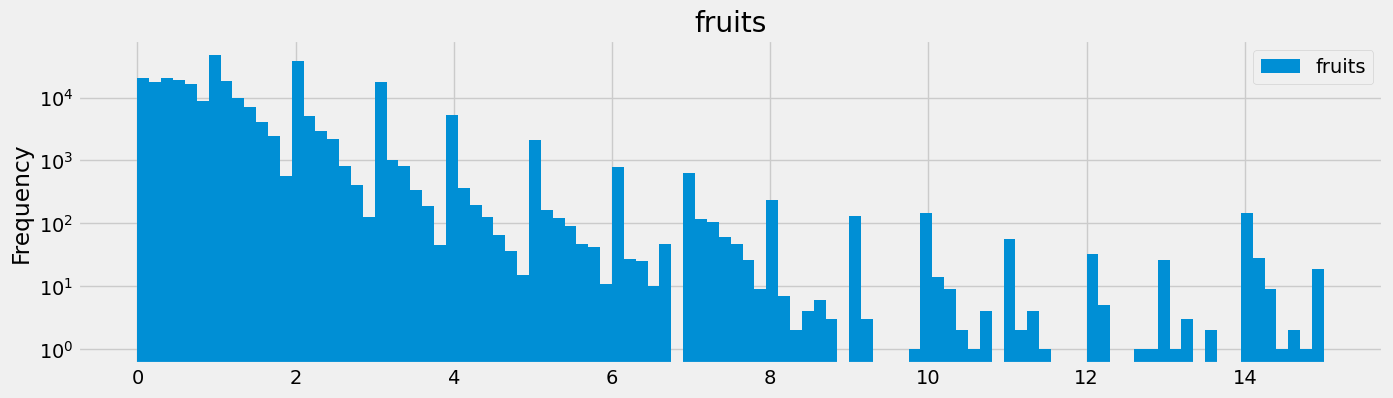


*** vegetables *** :
50 lower and 50 higher values with the associated count:


,0.000000,0.020000,0.020000,0.020000,0.020000,0.030000,0.030000,0.030000,0.040000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.070000,0.070000,0.080000,0.090000,0.090000,0.100000,0.100000,0.100000,0.110000,0.110000,0.120000,0.120000,0.130000,0.130000,0.140000,0.140000,0.140000,0.150000,0.150000,0.160000,0.160000,0.170000,0.170000,0.170000,0.170000,0.180000,0.180000,0.190000,0.190000,0.200000,0.200000,0.200000,0.210000,0.210000,0.210000,0.220000,0.230000,0.230000,0.230000,0.240000,0.240000,0.240000,0.250000,0.260000,0.260000,0.270000,0.270000,0.270000,0.280000,0.280000,0.290000,0.290000,0.290000,0.290000,0.300000,0.300000,0.300000,0.310000,0.310000,0.320000,0.320000,0.330000,0.330000,0.330000,0.330000,0.340000,0.340000,0.350000,0.350000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.400000,0.400000,0.400000,0.410000,0.410000,0.420000,0.420000,0.430000,0.430000,0.440000,0.440000,0.450000,0.450000,0.460000,0.460000,0.460000,0.470000,0.470000,0.480000,0.480000,0.490000,0.490000,0.500000,0.510000,0.520000,0.520000,0.530000,0.530000,0.540000,0.540000,0.550000,0.560000,0.560000,0.570000,0.570000,0.580000,0.580000,0.580000,0.590000,0.590000,0.600000,0.600000,0.610000,0.610000,0.620000,0.620000,0.630000,0.630000,0.640000,0.640000,0.640000,0.650000,0.650000,0.660000,0.660000,0.670000,0.670000,0.680000,0.680000,0.690000,0.700000,0.700000,0.710000,0.710000,0.710000,0.720000,0.720000,0.730000,0.730000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.770000,0.770000,0.780000,0.780000,0.790000,0.790000,0.800000,0.800000,0.810000,0.810000,0.820000,0.820000,0.830000,0.830000,0.840000,0.840000,0.850000,0.850000,0.860000,0.860000,0.860000,0.870000,0.870000,0.880000,0.880000,0.890000,0.890000,0.900000,0.900000,0.910000,0.910000,0.920000,0.920000,0.930000,0.930000,0.933333,0.935333,0.935667,0.940000,0.944000,0.948333,0.948667,0.950000,0.950000,0.952000,0.953000,0.957000,0.959333,0.960000,0.960000,0.960000,0.961667,0.962000,0.966667,0.967667,0.969000,0.970000,0.970000,0.973333,0.974333,0.977000,0.980000,0.980000,0.990000,0.999667,1.000000,1.001000,1.001333,1.002000,1.002333,1.002333,1.003333,1.003667,1.004333,1.004333,1.004667,1.005333,1.005667,1.006000,1.006333,1.006667,1.007000,1.007667,1.008000,1.009000,1.009333,1.009667,1.010000,1.010000,1.010333,1.010667,1.011000,1.011333,1.011667,1.012000,1.012333,1.013000,1.013333,1.013667,1.014000,1.014333,1.015000,1.015333,1.015667,1.016333,1.016667,1.017333,1.017667,1.018000,1.018667,1.019000,1.019333,1.020000,1.020000,1.020000,1.020333,1.020667,1.021000,1.021333,1.021667,1.022000,1.022333,1.022667,1.023000,1.023333,1.023667,1.024000,1.024333,1.024667,1.025000,1.025333,1.025667,1.026000,1.026667,1.027000,1.027667,1.028000,1.028333,1.028667,1.029000,1.029333,1.029667,1.030000,1.030000,1.030333,1.030667,1.031000,1.031333,1.032000,1.032333,1.032667,1.033000,1.033333,1.033667,1.034000,1.034000,1.034333,1.035333,1.035667,1.036667,1.037667,1.038000,1.038333,1.038667,1.039000,1.040000,1.040000,1.040333,1.040667,1.041000,1.042000,1.042333,1.042667,1.043000,1.043333,1.043667,1.044333,1.044667,1.045333,1.045667,1.046000,1.047333,1.047667,1.048667,1.049000,1.050000,1.051000,1.052333,1.052667,1.053333,1.053667,1.055667,1.056667,1.057000,1.057333,1.057667,1.058667,1.060000,1.060000,1.061667,1.062000,1.064333,1.066667,1.070000,1.070000,1.080000,1.090000,1.100000,1.100000,1.110000,1.120000,1.120000,1.130000,1.130000,1.140000,1.140000,1.140000,1.150000,1.150000,1.160000,1.170000,1.170000,1.180000,1.190000,1.200000,1.200000,1.210000,1.210000,1.220000,1.230000,1.230000,1.240000,1.240000,1.250000,1.260000,1.260000,1.270000,1.280000,1.280000,1.290000,1.290000,1.290000,1.300000,1.300000,1.310000,1.310000,1.320000,1.320000,1.330000,1.330000,1.330000,1.340000,1.340000,1.350000,1.360000,1.360000,1.370000,1.380000,1.380000,1.390000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.440000,1.450000,1.450000,1.460000,1.460000,1.470000,1.480000,1.490000,1.490000,1.5

,0.000000,0.020000,0.020000,0.020000,0.020000,0.030000,0.030000,0.030000,0.040000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.070000,0.070000,0.080000,0.090000,0.090000,0.100000,0.100000,0.100000,0.110000,0.110000,0.120000,0.120000,0.130000,0.130000,0.140000,0.140000,0.140000,0.150000,0.150000,0.160000,0.160000,0.170000,0.170000,0.170000,0.170000,0.180000,0.180000,0.190000,0.190000,0.200000,0.200000,0.200000,0.210000,0.210000,0.210000,0.220000,0.230000,0.230000,0.230000,0.240000,0.240000,0.240000,0.250000,0.260000,0.260000,0.270000,0.270000,0.270000,0.280000,0.280000,0.290000,0.290000,0.290000,0.290000,0.300000,0.300000,0.300000,0.310000,0.310000,0.320000,0.320000,0.330000,0.330000,0.330000,0.330000,0.340000,0.340000,0.350000,0.350000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.400000,0.400000,0.400000,0.410000,0.410000,0.420000,0.420000,0.430000,0.430000,0.440000,0.440000,0.450000,0.450000,0.460000,0.460000,0.460000,0.470000,0.470000,0.480000,0.480000,0.490000,0.490000,0.500000,0.510000,0.520000,0.520000,0.530000,0.530000,0.540000,0.540000,0.550000,0.560000,0.560000,0.570000,0.570000,0.580000,0.580000,0.580000,0.590000,0.590000,0.600000,0.600000,0.610000,0.610000,0.620000,0.620000,0.630000,0.630000,0.640000,0.640000,0.640000,0.650000,0.650000,0.660000,0.660000,0.670000,0.670000,0.680000,0.680000,0.690000,0.700000,0.700000,0.710000,0.710000,0.710000,0.720000,0.720000,0.730000,0.730000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.770000,0.770000,0.780000,0.780000,0.790000,0.790000,0.800000,0.800000,0.810000,0.810000,0.820000,0.820000,0.830000,0.830000,0.840000,0.840000,0.850000,0.850000,0.860000,0.860000,0.860000,0.870000,0.870000,0.880000,0.880000,0.890000,0.890000,0.900000,0.900000,0.910000,0.910000,0.920000,0.920000,0.930000,0.930000,0.933333,0.935333,0.935667,0.940000,0.944000,0.948333,0.948667,0.950000,0.950000,0.952000,0.953000,0.957000,0.959333,0.960000,0.960000,0.960000,0.961667,0.962000,0.966667,0.967667,0.969000,0.970000,0.970000,0.973333,0.974333,0.977000,0.980000,0.980000,0.990000,0.999667,1.000000,1.001000,1.001333,1.002000,1.002333,1.002333,1.003333,1.003667,1.004333,1.004333,1.004667,1.005333,1.005667,1.006000,1.006333,1.006667,1.007000,1.007667,1.008000,1.009000,1.009333,1.009667,1.010000,1.010000,1.010333,1.010667,1.011000,1.011333,1.011667,1.012000,1.012333,1.013000,1.013333,1.013667,1.014000,1.014333,1.015000,1.015333,1.015667,1.016333,1.016667,1.017333,1.017667,1.018000,1.018667,1.019000,1.019333,1.020000,1.020000,1.020000,1.020333,1.020667,1.021000,1.021333,1.021667,1.022000,1.022333,1.022667,1.023000,1.023333,1.023667,1.024000,1.024333,1.024667,1.025000,1.025333,1.025667,1.026000,1.026667,1.027000,1.027667,1.028000,1.028333,1.028667,1.029000,1.029333,1.029667,1.030000,1.030000,1.030333,1.030667,1.031000,1.031333,1.032000,1.032333,1.032667,1.033000,1.033333,1.033667,1.034000,1.034000,1.034333,1.035333,1.035667,1.036667,1.037667,1.038000,1.038333,1.038667,1.039000,1.040000,1.040000,1.040333,1.040667,1.041000,1.042000,1.042333,1.042667,1.043000,1.043333,1.043667,1.044333,1.044667,1.045333,1.045667,1.046000,1.047333,1.047667,1.048667,1.049000,1.050000,1.051000,1.052333,1.052667,1.053333,1.053667,1.055667,1.056667,1.057000,1.057333,1.057667,1.058667,1.060000,1.060000,1.061667,1.062000,1.064333,1.066667,1.070000,1.070000,1.080000,1.090000,1.100000,1.100000,1.110000,1.120000,1.120000,1.130000,1.130000,1.140000,1.140000,1.140000,1.150000,1.150000,1.160000,1.170000,1.170000,1.180000,1.190000,1.200000,1.200000,1.210000,1.210000,1.220000,1.230000,1.230000,1.240000,1.240000,1.250000,1.260000,1.260000,1.270000,1.280000,1.280000,1.290000,1.290000,1.290000,1.300000,1.300000,1.310000,1.310000,1.320000,1.320000,1.330000,1.330000,1.330000,1.340000,1.340000,1.350000,1.360000,1.360000,1.370000,1.380000,1.380000,1.390000,1.390000,1.400000,1.410000,1.420000,1.430000,1.430000,1.440000,1.440000,1.450000,1.450000,1.460000,1.460000,1.470000,1.480000,1.490000,1.490000,1.5

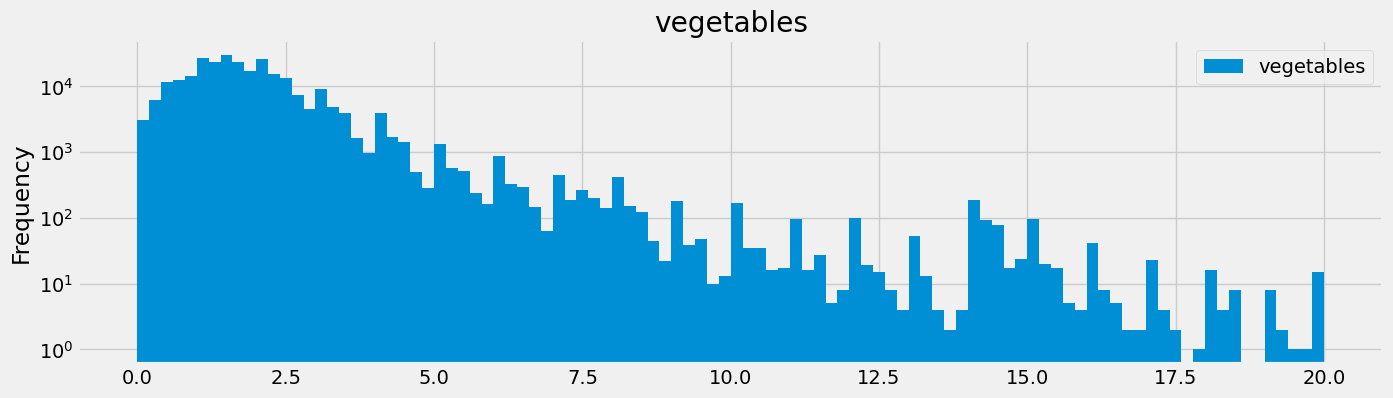

In [76]:
# Remove outliers in the numerical columns
# IQR filter: within 2.22 IQR (equiv. to z-score < 3 for normal data
#    but more robust to outliers)


def remove_outiers(data1, col, z_score):
    """Remove the outliers in a df column.
    The method with IQR is more robust to outliers than z-score.
    In a normal distribution 1.35 is equivalent to 1 std."""
    df_sub = data1.loc[:, col].copy()
    q3 = df_sub.quantile(0.75, numeric_only=False)
    q1 = df_sub.quantile(0.25, numeric_only=False)
    iqr = q3 - q1
    lim = (np.abs((df_sub - df_sub.median()) / iqr) < z_score / 1.35)
    print('\nNb outliers removed:', lim.value_counts().values[1])
    data1.loc[:, col] = df_sub.where(lim, np.nan)
    print('The extreme values are now:', end=' ')
    print(round(data1.loc[:, col].max().values[0], 2), 
          round(data1.loc[:, col].min().values[0], 2))
    data1.dropna(subset=col, inplace=True)

# Height
z_score = 3
col = ['height']
# remove_outiers(data1, col, z_score)

# Height
z_score = 4
col = ['weight']
# remove_outiers(data1, col, z_score)


# As the outliers are not random but made by some people (even kids) joking
# may be better to choose by common sense the max and min values
cut_off = {
    'height': [1.30, 2.10],
    'weight': [45, 220], 
    'vegetables': [0, 20],
    'fruits': [0, 15],
    'alcohol': [0, 8]
}
for col, maxmin in cut_off.items():
    mask = (data1[col] >= maxmin[0]) & (data1[col] <= maxmin[1])
    print(col, maxmin, '.Removed:', data1.shape[0] - sum(1*mask))
    data1[col] = data1[col].where(mask, np.nan)
    data1.dropna(subset=col, inplace=True)


# Plots
ef.draw_histogram(data1[numerical_columns], bins=100, logy=True)


In [86]:
# importlib.reload(ef)
# ef.draw_histogram(data1[numerical_columns], bins=200)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272753 entries, 1 to 275438
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   state_id           272753 non-null  category
 1   sex                272753 non-null  category
 2   general_health     272753 non-null  category
 3   med_cost_issue     272753 non-null  category
 4   physical_activity  272753 non-null  category
 5   blood_pressure     272753 non-null  category
 6   cholesterol        272753 non-null  category
 7   stroke             272753 non-null  category
 8   asthma             272753 non-null  category
 9   depression         272753 non-null  category
 10  diabete            272753 non-null  category
 11  arthritis          272753 non-null  category
 12  education          272753 non-null  category
 13  veteran            272753 non-null  category
 14  income             272753 non-null  category
 15  weight             272753 non-null

In [85]:
# Remove the feature 'alcohol' as it is based only on the past 30 days
# moreover it seems that they made mistakes in their calculation, like x100 and kept 99/88/999/... from the
# 2 features they multiplied to get the feature 'alcohol'



# Save the cleaned file
data1.to_csv('brfss2021_cleaned.csv') #, index=False)
# test = pd.read_csv('brfss2021_cleaned.csv')
# display(test.head())


In [78]:
# Correlations

# it removes the category features so no cvd  ----------->  use .cut to bin them and use cramer-v
# create a copy of df to work on correlations

corr_matrix = data1.corr(method='spearman') #, numeric_only=False)
display(corr_matrix.head())
# corr_matrix = abs(corr_matrix)   # don't care about the sign, only the absolute values
# by sorting by corr with target, when several cols are correlated it is the one the 
# most correlated with the target that will be kept
corr_matrix = corr_matrix.sort_values(by='cvd', ascending=False)   ####### is i tcorrect to do pearsn when target is binary? idem for pproject week 7
corr_matrix = corr_matrix[corr_matrix.index]

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Want diagonal elements as well?
# mask[np.diag_indices_from(mask)] = False

f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(180, 180, as_cmap=True)

sns_plot = sns.heatmap(corr_matrix,  cmap=cmap, vmax=.9, center=0,  # mask=mask,
                       square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) #True)

# fig = sns_plot.get_figure()
# fig.savefig("features_heatmap.png")



ValueError: could not convert string to float: 'overweight'

In [ ]:
"""
# Max correlations

corr_threshold = 0.9
corr_cols = []

for n_row in range(len(corr_matrix)):
    print('---', corr_matrix.index[n_row], '(', 
          round(corr_matrix.iloc[n_row]['Bankrupt?'], 3), ')')
    for n_col in range(len(corr_matrix)):
        if (abs(corr_matrix.iloc[n_row, n_col]) > corr_threshold) and (n_col > n_row):
            print('        ', corr_matrix.columns[n_col], 
                  ': ***', round(corr_matrix.iloc[n_row, n_col], 3),
                  '*** (', round(corr_matrix.loc['Bankrupt?'][corr_matrix.columns[n_col]], 3), ')'
            )
            corr_cols.append(corr_matrix.columns[n_col])

corr_cols = list(set(corr_cols))
print('\n', len(corr_cols))
print((corr_cols))
""";

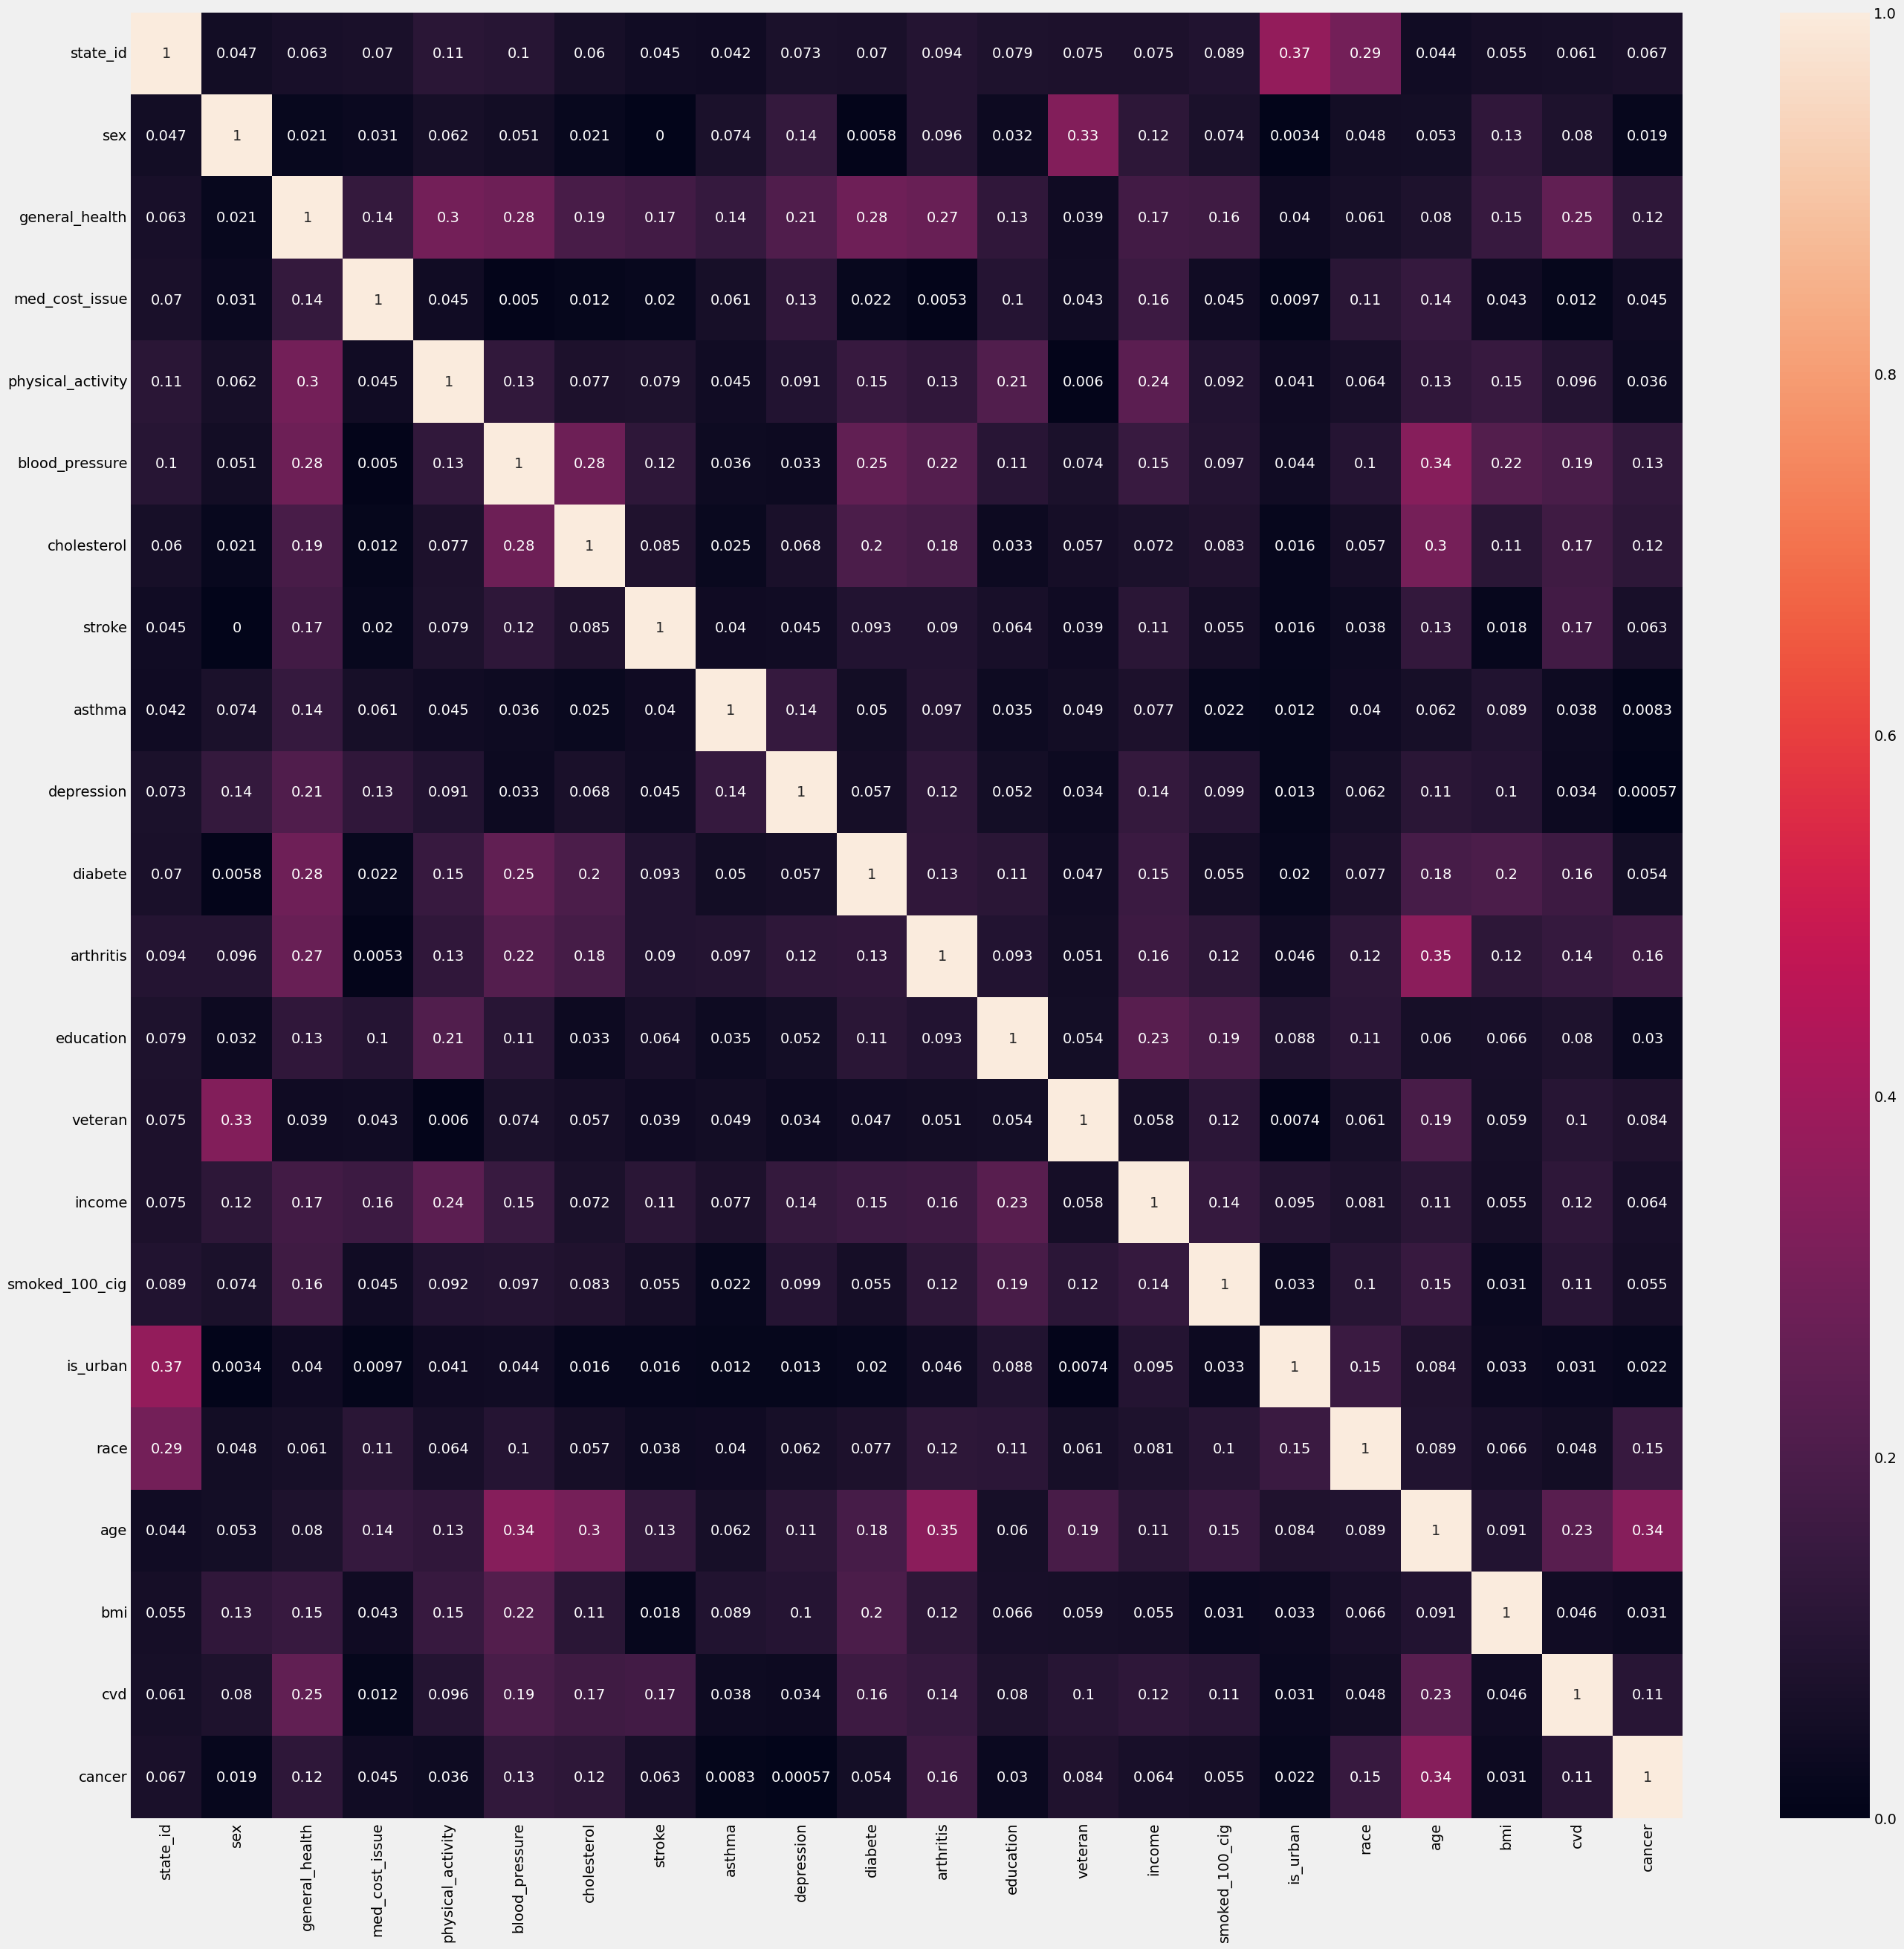

In [79]:
# This cell is from stackoverflow

from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss
import seaborn as sns
def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_corr= get_corr_mat(data1[categorical_columns])
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cat_corr, annot = True)
plt.show()

# cannot be <0 ?


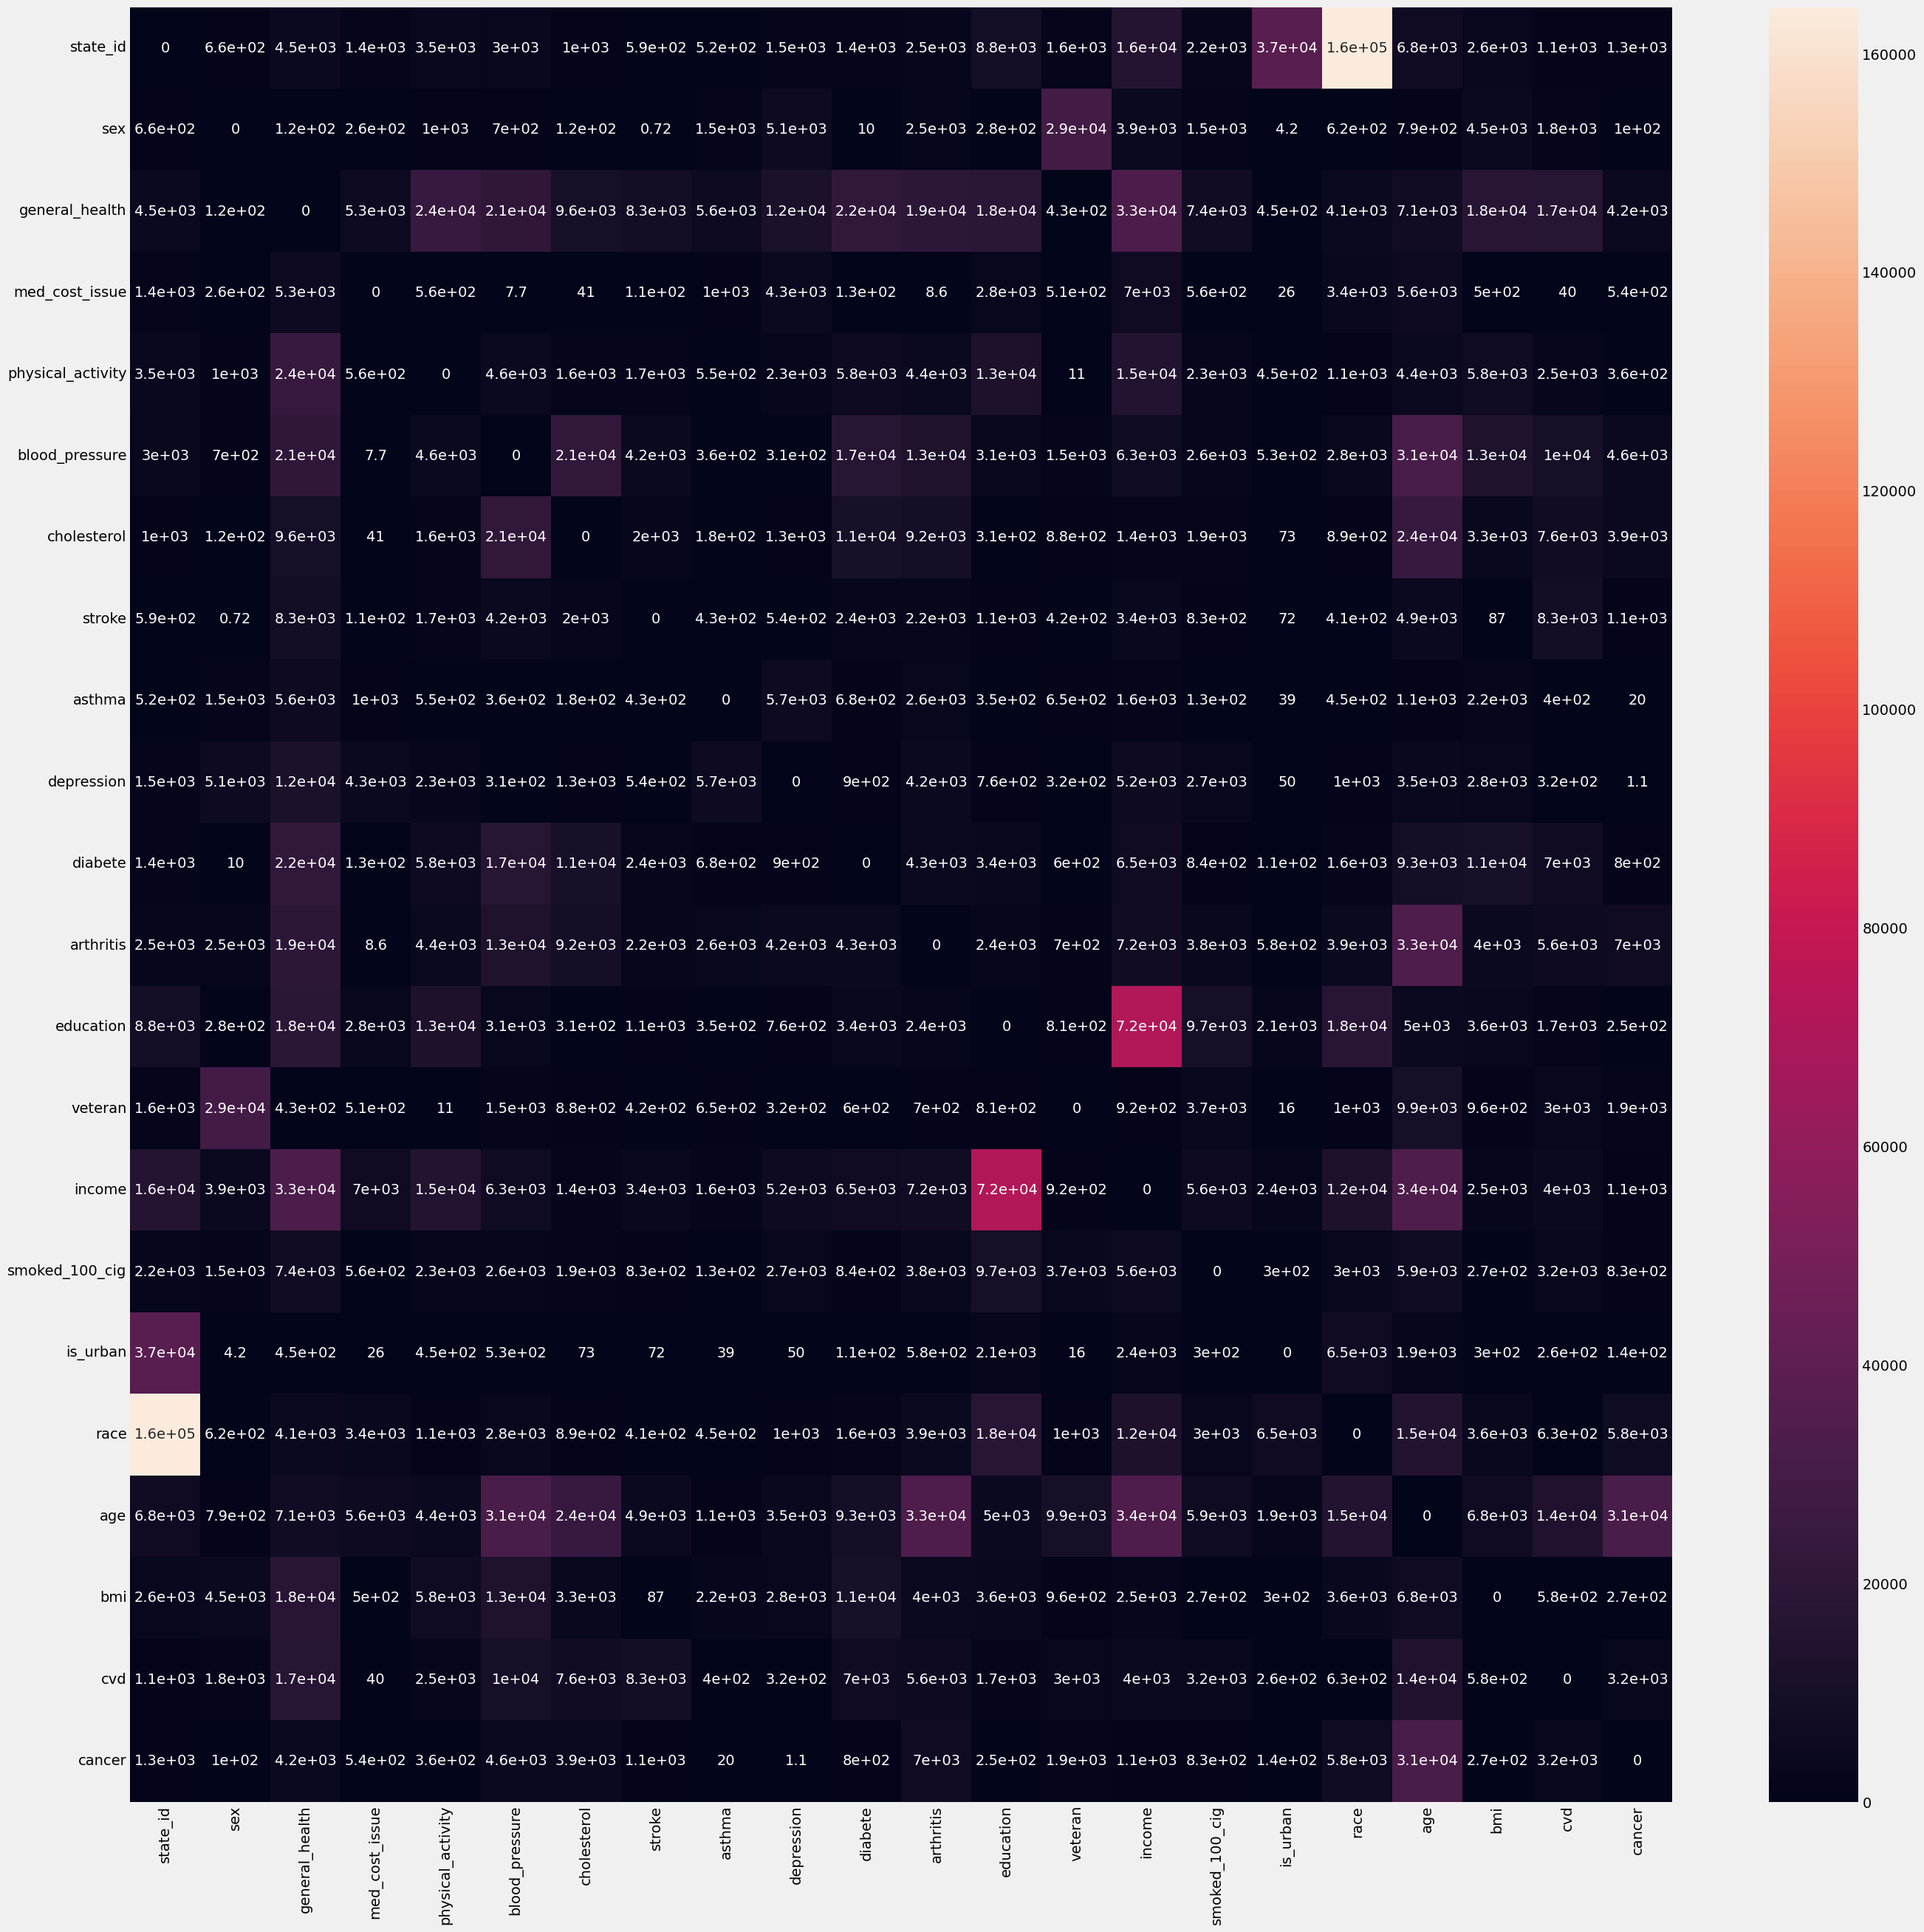

In [80]:
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in factors_paired:
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(chi2, annot = True)
    plt.show()

# ch_calculate(data1[categorical_columns])

In [ ]:
"""
Angina and heart attack are two manifestations in the continuum of the same disease. Angina is a situation where there is a 
demand-supply imbalance, and the heart muscle is not getting enough oxygen, is not getting enough fresh blood. And so the 
heart muscle is crying out for help, and sometimes it presents as chest pain, sometimes it presents as jaw pain. When the 
heart muscle continues to be deprived of oxygen and fresh blood, that muscle ends up dying, and when that muscle dies, we 
call it a heart attack.

Stroke is completely different. Stroke has nothing to do, or has very little to do, with the heart. It is more of a 
deprivation of blood supply to the brain, and brain cells then either die, or they struggle, and that results in a stroke.


""";
